In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pingouin as pg
sns.set_theme(style="ticks", color_codes=True)
#import math
pd.set_option('display.max_rows', None)

c:\Users\au657021\Anaconda3\envs\buzz_env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# __Load Data__

In [2]:
#Load all data
ph_results_df = pd.read_csv('finalResults_Ph.csv')
vr_results_df = pd.read_csv('finalResults_VR.csv')
ph_results_part_invalid_df = pd.read_csv('finalResults_part_invalid_Ph.csv')
vr_results_part_invalid_df = pd.read_csv('finalResults_part_invalid_VR.csv')
#Merge ph_results_df with ph_results_part_invalid_df
ph_results_df = ph_results_df.append(ph_results_part_invalid_df)
vr_results_df = vr_results_df.append(vr_results_part_invalid_df)
#Store as csv
#ph_results_df.to_csv('finalResults_Ph_all.csv')
#vr_results_df.to_csv('finalResults_VR_all.csv')

online_responses_df = pd.read_csv('..\\OnlineSurvey\\BuzzwireOnlineResponses.csv')

vr_results_df.drop(['Unnamed: 0'], axis=1, inplace=True)
ph_results_df.drop(['Unnamed: 0'], axis=1, inplace=True)

#vr_results_df['Condition'] = 'VR'
#ph_results_df['Condition'] = 'Physical'

vr_results_df['Participant_ID'] = vr_results_df['Participant_ID'].str.upper()
ph_results_df['Participant_ID'] = ph_results_df['Participant_ID'].str.upper()
online_responses_df['Participant_ID'] = online_responses_df['Participant_ID'].str.upper()



# __Process and Clean Data for Statistics__

In [22]:
#Normalize the data
def normalize_signals(df):

    '''
    df['Norm_Pretest_HR'] = (df['Pretest_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Pretest_GSR'] = (df['Pretest_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Pretest_GSR_Peaks_Rate'] = (df['Pretest_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Level_1_HR'] = (df['Level_1_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Level_1_GSR'] = (df['Level_1_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Level_1_GSR_Peaks_Rate'] = (df['Level_1_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Level_2_HR'] = (df['Level_2_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Level_2_GSR'] = (df['Level_2_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Level_2_GSR_Peaks_Rate'] = (df['Level_2_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Level_3_HR'] = (df['Level_3_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Level_3_GSR'] = (df['Level_3_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Level_3_GSR_Peaks_Rate'] = (df['Level_3_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Level_4_HR'] = (df['Level_4_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Level_4_GSR'] = (df['Level_4_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Level_4_GSR_Peaks_Rate'] = (df['Level_4_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Posttest_HR'] = (df['Posttest_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Posttest_GSR'] = (df['Posttest_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Posttest_GSR_Peaks_Rate'] = (df['Posttest_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']
    '''
    
    df['Baseline_GSR_Peaks_Rate'] = df['Baseline_GSR_Peaks_Rate'] * 60
    
    df['Pretest_HR_Corrected'] = df['Pretest_HR'] - df['Baseline_HR']
    df['Pretest_NNI_Corrected'] = df['Pretest_Mean_NNI'] - df['Baseline_Mean_NNI']
    df['Pretest_RMSSD_Corrected'] = df['Pretest_RMSSD'] - df['Baseline_RMSSD']
    df['Pretest_SDNN_Corrected'] = df['Pretest_SDNN'] - df['Baseline_SDNN']
    df['Pretest_LFHF_Ratio_Corrected'] = df['Pretest_LFHF_Ratio'] - df['Baseline_LFHF_Ratio']
    df['Pretest_HFN_Corrected'] = df['Pretest_HFN'] - df['Baseline_HFN']
    df['Pretest_LFN_Corrected'] = df['Pretest_LFN'] - df['Baseline_LFN']
    df['Pretest_GSR_Corrected'] = df['Pretest_GSR'] - df['Baseline_GSR']
    df['Pretest_GSR_Peaks_Rate_Corrected'] = df['Pretest_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'] * 60

    df['Level_1_HR_Corrected'] = df['Level_1_HR'] - df['Baseline_HR']
    df['Level_1_NNI_Corrected'] = df['Level_1_Mean_NNI'] - df['Baseline_Mean_NNI']
    df['Level_1_RMSSD_Corrected'] = df['Level_1_RMSSD'] - df['Baseline_RMSSD']
    df['Level_1_SDNN_Corrected'] = df['Level_1_SDNN'] - df['Baseline_SDNN']
    df['Level_1_LFHF_Ratio_Corrected'] = df['Level_1_LFHF_Ratio'] - df['Baseline_LFHF_Ratio']
    df['Level_1_HFN_Corrected'] = df['Level_1_HFN'] - df['Baseline_HFN']
    df['Level_1_LFN_Corrected'] = df['Level_1_LFN'] - df['Baseline_LFN']
    df['Level_1_GSR_Corrected'] = df['Level_1_GSR'] - df['Baseline_GSR']
    df['Level_1_GSR_Peaks_Rate_Corrected'] = df['Level_1_GSR_Peaks_Rate'] * 60 # - df['Baseline_GSR_Peaks_Rate']

    df['Level_2_HR_Corrected'] = df['Level_2_HR'] - df['Baseline_HR']
    df['Level_2_NNI_Corrected'] = df['Level_2_Mean_NNI'] - df['Baseline_Mean_NNI']
    df['Level_2_RMSSD_Corrected'] = df['Level_2_RMSSD'] - df['Baseline_RMSSD']
    df['Level_2_SDNN_Corrected'] = df['Level_2_SDNN'] - df['Baseline_SDNN']
    df['Level_2_LFHF_Ratio_Corrected'] = df['Level_2_LFHF_Ratio'] - df['Baseline_LFHF_Ratio']
    df['Level_2_HFN_Corrected'] = df['Level_2_HFN'] - df['Baseline_HFN']    
    df['Level_2_LFN_Corrected'] = df['Level_2_LFN'] - df['Baseline_LFN']
    df['Level_2_GSR_Corrected'] = df['Level_2_GSR'] - df['Baseline_GSR']
    df['Level_2_GSR_Peaks_Rate_Corrected'] = df['Level_2_GSR_Peaks_Rate'] * 60 # - df['Baseline_GSR_Peaks_Rate']

    df['Level_3_HR_Corrected'] = df['Level_3_HR'] - df['Baseline_HR']
    df['Level_3_NNI_Corrected'] = df['Level_3_Mean_NNI'] - df['Baseline_Mean_NNI']
    df['Level_3_RMSSD_Corrected'] = df['Level_3_RMSSD'] - df['Baseline_RMSSD']
    df['Level_3_SDNN_Corrected'] = df['Level_3_SDNN'] - df['Baseline_SDNN']
    df['Level_3_LFHF_Ratio_Corrected'] = df['Level_3_LFHF_Ratio'] - df['Baseline_LFHF_Ratio']
    df['Level_3_HFN_Corrected'] = df['Level_3_HFN'] - df['Baseline_HFN']
    df['Level_3_LFN_Corrected'] = df['Level_3_LFN'] - df['Baseline_LFN']
    df['Level_3_GSR_Corrected'] = df['Level_3_GSR'] - df['Baseline_GSR']
    df['Level_3_GSR_Peaks_Rate_Corrected'] = df['Level_3_GSR_Peaks_Rate'] * 60 # - df['Baseline_GSR_Peaks_Rate']

    df['Level_4_HR_Corrected'] = df['Level_4_HR'] - df['Baseline_HR']
    df['Level_4_NNI_Corrected'] = df['Level_4_Mean_NNI'] - df['Baseline_Mean_NNI']
    df['Level_4_RMSSD_Corrected'] = df['Level_4_RMSSD'] - df['Baseline_RMSSD']
    df['Level_4_SDNN_Corrected'] = df['Level_4_SDNN'] - df['Baseline_SDNN']
    df['Level_4_LFHF_Ratio_Corrected'] = df['Level_4_LFHF_Ratio'] - df['Baseline_LFHF_Ratio']
    df['Level_4_HFN_Corrected'] = df['Level_4_HFN'] - df['Baseline_HFN']    
    df['Level_4_LFN_Corrected'] = df['Level_4_LFN'] - df['Baseline_LFN']
    df['Level_4_GSR_Corrected'] = df['Level_4_GSR'] - df['Baseline_GSR']
    df['Level_4_GSR_Peaks_Rate_Corrected'] = df['Level_4_GSR_Peaks_Rate'] * 60 # - df['Baseline_GSR_Peaks_Rate']

    df['Posttest_HR_Corrected'] = df['Posttest_HR'] - df['Baseline_HR']
    df['Posttest_NNI_Corrected'] = df['Posttest_Mean_NNI'] - df['Baseline_Mean_NNI']
    df['Posttest_RMSSD_Corrected'] = df['Posttest_RMSSD'] - df['Baseline_RMSSD']
    df['Posttest_SDNN_Corrected'] = df['Posttest_SDNN'] - df['Baseline_SDNN']
    df['Posttest_LFHF_Ratio_Corrected'] = df['Posttest_LFHF_Ratio'] - df['Baseline_LFHF_Ratio']
    df['Posttest_HFN_Corrected'] = df['Posttest_HFN'] - df['Baseline_HFN']    
    df['Posttest_LFN_Corrected'] = df['Posttest_LFN'] - df['Baseline_LFN']
    df['Posttest_GSR_Corrected'] = df['Posttest_GSR'] - df['Baseline_GSR']
    df['Posttest_GSR_Peaks_Rate_Corrected'] = df['Posttest_GSR_Peaks_Rate'] * 60 # - df['Baseline_GSR_Peaks_Rate']

    

#Difference between pre-test and post-test time/mistakes in a new column
def calculate_gains(df):
    df['Time_Gain'] = df['Pretest_Time'] - df['Posttest_Time'] #More time gain = better performance
    df['Mistake_Gain'] = df['Pretest_Mistake_Time'] - df['Posttest_Mistake_Time'] #More time gain = better performance

#Calculate mean normalized HR across 4 training levels
def calculate_mean_training_hr(df):
    df['Mean_Norm_Training_HR'] = (df['Level_1_HR_Corrected'] + df['Level_2_HR_Corrected'] + df['Level_3_HR_Corrected'] + df['Level_4_HR_Corrected']) / 4

def calculate_mean_training_nn(df):
    df['Mean_Norm_Training_NNI'] = (df['Level_1_NNI_Corrected'] + df['Level_2_NNI_Corrected'] + df['Level_3_NNI_Corrected'] + df['Level_4_NNI_Corrected']) / 4    

#Calculate mean normalized HR across 4 training levels
def calculate_mean_training_rmssd(df):
    df['Mean_Training_RMSSD'] = (df['Level_1_RMSSD_Corrected'] + df['Level_2_RMSSD_Corrected'] + df['Level_3_RMSSD_Corrected'] + df['Level_4_RMSSD_Corrected']) / 4

def calculate_mean_training_sdnn(df):
    df['Mean_Training_SDNN'] = (df['Level_1_SDNN_Corrected'] + df['Level_2_SDNN_Corrected'] + df['Level_3_SDNN_Corrected'] + df['Level_4_SDNN_Corrected']) / 4

def calculate_mean_training_lfhfratio(df):
    df['Mean_Training_LFHF_Ratio'] = (df['Level_1_LFHF_Ratio_Corrected'] + df['Level_2_LFHF_Ratio_Corrected'] + df['Level_3_LFHF_Ratio_Corrected'] + df['Level_4_LFHF_Ratio_Corrected']) / 4

def calculate_mean_training_hfn(df):
    df['Mean_Training_HFN'] = (df['Level_1_HFN_Corrected'] + df['Level_2_HFN_Corrected'] + df['Level_3_HFN_Corrected'] + df['Level_4_HFN_Corrected']) / 4

def calculate_mean_training_lfn(df):
    df['Mean_Training_LFN'] = (df['Level_1_LFN_Corrected'] + df['Level_2_LFN_Corrected'] + df['Level_3_LFN_Corrected'] + df['Level_4_LFN_Corrected']) / 4

#Calculate mean normalized GSR across 4 training levels    
def calculate_mean_training_gsr(df):
    df['Mean_Norm_Training_GSR'] = (df['Level_1_GSR_Corrected'] + df['Level_2_GSR_Corrected'] + df['Level_3_GSR_Corrected'] + df['Level_4_GSR_Corrected']) / 4

def calculate_mean_training_gsr_peaks_rate(df):
    df['Mean_Norm_Training_GSR_Peaks_Rate'] = (df['Level_1_GSR_Peaks_Rate_Corrected'] + df['Level_2_GSR_Peaks_Rate_Corrected'] + df['Level_3_GSR_Peaks_Rate_Corrected'] + df['Level_4_GSR_Peaks_Rate_Corrected']) / 4

def calculate_mean_training_gsr_peak_amplitude(df):
    df['Mean_Training_GSR_Peak_Amplitude'] = df[["Level_1_GSR_Mean_Peak_Amplitude", "Level_2_GSR_Mean_Peak_Amplitude","Level_3_GSR_Mean_Peak_Amplitude","Level_4_GSR_Mean_Peak_Amplitude"]].mean(axis=1, skipna=True) #np.nansum([df['Level_1_GSR_Peak_Amplitude'], df['Level_2_GSR_Peak_Amplitude'], df['Level_3_GSR_Peak_Amplitude'], df['Level_4_GSR_Peak_Amplitude']) / 4       

def calculate_self_efficacy_gain(df):
    df['Eff_Diff'] = df['Self_Efficacy_2'] - df['Self_Efficacy_1']

def calculate_nasa_tlx_score(df):
    df['NASA_TLX_Score'] = (df['Mental Demand'] + df['Physical Demand'] + df['Temporal Demand'] + df['Performance'] + df['Effort'] + df['Frustration']) / 6    

def calculate_immersion_score(df):    
    #Sum of all columns from immersion1 to immersion11
    df['Immersion_Score'] = (df['Immersion1'] + df['Immersion2'] + df['Immersion3'] + df['Immersion4'] + df['Immersion5'] + df['Immersion6'] + df['Immersion7'] + df['Immersion8'] + df['Immersion9'] + df['Immersion10'] + df['Immersion11'] ) / 11
    
    
def calculate_presence_score(df):   
    #Sum of all columns from presence1 to presence14
    df['Presence_Score'] = (df['Presence1'] + df['Presence2'] + df['Presence3'] + df['Presence4'] + df['Presence5'] + df['Presence6'] + df['Presence7'] + df['Presence8'] + df['Presence9'] + (7-df['Presence10']) + df['Presence11'] + (7-df['Presence12']) + (7-df['Presence13']) + df['Presence14'] ) / 14
    
    

In [23]:
normalize_signals(ph_results_df)
normalize_signals(vr_results_df)

calculate_gains(ph_results_df)
calculate_gains(vr_results_df)

calculate_mean_training_hr(ph_results_df)
calculate_mean_training_hr(vr_results_df)

calculate_mean_training_nn(ph_results_df)
calculate_mean_training_nn(vr_results_df)

calculate_mean_training_rmssd(ph_results_df)
calculate_mean_training_rmssd(vr_results_df)

calculate_mean_training_sdnn(ph_results_df)
calculate_mean_training_sdnn(vr_results_df)

calculate_mean_training_lfhfratio(ph_results_df)
calculate_mean_training_lfhfratio(vr_results_df)

calculate_mean_training_hfn(ph_results_df)
calculate_mean_training_hfn(vr_results_df)

calculate_mean_training_lfn(ph_results_df)
calculate_mean_training_lfn(vr_results_df)

calculate_mean_training_gsr(ph_results_df)
calculate_mean_training_gsr(vr_results_df)

calculate_mean_training_gsr_peaks_rate(ph_results_df)
calculate_mean_training_gsr_peaks_rate(vr_results_df)

calculate_mean_training_gsr_peak_amplitude(ph_results_df)
calculate_mean_training_gsr_peak_amplitude(vr_results_df)



In [24]:
combined_results_df = pd.concat([vr_results_df, ph_results_df], axis=0)
#Merge the online responses with the combined results DF (sensor data)
combined_results_df = pd.merge(combined_results_df, online_responses_df, on='Participant_ID', how='outer')
#combined_results_df.to_csv('combinedResults.csv')
calculate_self_efficacy_gain(combined_results_df)
calculate_nasa_tlx_score(combined_results_df)


In [25]:
#combined_results_df.loc[ combined_results_df["Presence1"] == "Somewhat\n  Disagree", "Presence1"] = "Somewhat Disagree"
#combined_results_df.replace({"Presence1": {"Somewhat\n  Disagree": "Somewhat Disagree"}}, inplace=True)
combined_results_df.replace("Somewhat\n  Disagree", "Somewhat Disagree", inplace=True)
combined_results_df.replace("Somewhat\nDisagree", "Somewhat Disagree", inplace=True)
combined_results_df.replace("Strongly\n  Agree", "Strongly Agree", inplace=True)
combined_results_df.replace("Strongly\nAgree", "Strongly Agree", inplace=True)
combined_results_df.replace("Strongly\n  Disagree", "Strongly Disagree", inplace=True)
combined_results_df.replace("Strongly\nDisagree", "Strongly Disagree", inplace=True)
combined_results_df.replace("Somewhat\n  Agree", "Somewhat Agree", inplace=True)
combined_results_df.replace("Somewhat\nAgree", "Somewhat Agree", inplace=True)

#Replace all 'Strongly Agree' in combined_results_df with 7
combined_results_df.replace(
           {"Strongly Disagree"         : 1,
            "Disagree"                  : 2,
            "Somewhat Disagree"         : 3,
            "Neither Agree or Disagree" : 4,
            "Somewhat Agree"            : 5,
            "Agree"                     : 6,
            "Strongly Agree"            : 7}, inplace=True)

In [26]:
calculate_immersion_score(combined_results_df)
calculate_presence_score(combined_results_df)

#Find nan values in the column 'Condition' in combined_results_df 
#combined_results_df.loc[combined_results_df["Condition"].isnull(), ["Condition", "Participant_ID"]]

combined_results_df.loc[combined_results_df["Participant_ID"].str.startswith("2C"), "Condition"] = "Physical"
combined_results_df.loc[combined_results_df["Participant_ID"].str.startswith("2D"), "Condition"] = "VR"

In [27]:
#Combined score metric 
#ph_results_df['Norm_Pretest_Score'] = 1 / np.sqrt(ph_results_df['Pretest_Time'] * ph_results_df['Pretest_Mistake_Time'])
#ph_results_df['Norm_Level_1_Score'] = 1 / np.sqrt(ph_results_df['Level_1_Time'] * ph_results_df['Level_1_Mistake_Time'])
#ph_results_df['Norm_Level_2_Score'] = 1 / np.sqrt(ph_results_df['Level_2_Time'] * ph_results_df['Level_2_Mistake_Time'])
#ph_results_df['Norm_Level_3_Score'] = 1 / np.sqrt(ph_results_df['Level_3_Time'] * ph_results_df['Level_3_Mistake_Time'])
#ph_results_df['Norm_Level_4_Score'] = 1 / np.sqrt(ph_results_df['Level_4_Time'] * ph_results_df['Level_4_Mistake_Time'])

In [28]:
combined_results_df.rename(columns=
                            {'Mean_Norm_Training_HR' : 'Mean HR (Training)', 
                            'Mean_Norm_Training_NNI' : 'Mean NNI (Training)',
                            'Mean_Training_RMSSD': 'Mean RMSSD (Training)', 
                            'Mean_Training_SDNN': 'Mean SDNN (Training)', 
                            'Mean_Norm_Training_GSR_Peaks_Rate': 'Mean GSR Peaks Rate (Training)', 
                            'Mean_Training_LFHF_Ratio': 'Mean LFHF Ratio (Training)', 
                            'Time_Gain':'Task Completion Time (Gain)', 
                            'Mistake_Gain':'Mistake Time (Gain)', 
                            'Mean_Norm_Training_GSR' : 'Mean GSR (Training)',  
                            'Mean_Training_HFN' : 'Mean HF Normalized (Training)', 
                            'Mean_Training_LFN' : 'Mean LF Normalized (Training)', 
                            'Mean_Training_GSR_Peak_Amplitude' : 'Mean GSR Peak Amplitude (Training)'}, inplace=True)

In [29]:
combined_results_df['Mistake Time Score'] = pd.qcut(combined_results_df['Mistake Time (Gain)'] , 10, labels=[1,2,3,4,5,6,7,8,9,10])
combined_results_df['Task Time Score'] = pd.qcut(combined_results_df['Task Completion Time (Gain)'] , 10, labels=[1,2,3,4,5,6,7,8,9,10])

In [30]:
#combined_results_df['Mistake Time (Gain)'].hist(bins=10)
#combined_results_df['Task Completion Time (Gain)'].hist(bins=10)

In [31]:
#combined_results_df['Mistake Time Score'].hist(bins=10)
#combined_results_df['Mistake Time Score'] = pd.factorize(combined_results_df['Mistake Time Score'])[0]
#combined_results_df['Task Time Score'] = pd.factorize(combined_results_df['Task Time Score'])[0]
combined_results_df['Combined Performance Score'] = combined_results_df['Mistake Time Score'].astype(float) + combined_results_df['Task Time Score'].astype(float) 


In [32]:
#combined_results_df[['Mistake Time (Gain)','Mistake Time Score','Task Completion Time (Gain)','Task Time Score', 'Combined Performance Score']]

In [33]:
ph_results_df = combined_results_df[combined_results_df['Condition'] == 'Physical']
vr_results_df = combined_results_df[combined_results_df['Condition'] == 'VR']


In [34]:
vr_results_df.columns

Index(['Participant_ID', 'Baseline_HR', 'Baseline_GSR',
       'Baseline_GSR_Peaks_Rate', 'Baseline_GSR_Mean_Peak_Amplitude',
       'Baseline_RMSSD', 'Baseline_SDNN', 'Baseline_Mean_NNI', 'Baseline_LFN',
       'Baseline_HFN',
       ...
       'Effort', 'Frustration', 'Eff_Diff', 'NASA_TLX_Score',
       'Immersion_Score', 'Presence_Score', 'Condition', 'Mistake Time Score',
       'Task Time Score', 'Combined Performance Score'],
      dtype='object', length=194)

In [35]:
def check_normality_all_features(df):
    for column in df.columns:
        #print(column,' ', df[column].notna().value_counts())
        if column != 'Participant_ID' and pd.api.types.is_numeric_dtype(df[column]): 
            #check if columns starts with 'Baseline' or 'Posttest' or 'Pretest' or 'Level'
            if not column.startswith('Baseline') and not column.startswith('Posttest') and not column.startswith('Pretest') and not column.startswith('Level'):
                pval = stats.shapiro(df[df[column].notna()][column]).pvalue      
                if pval > 0.05:
                    print('** ',column,' is normally distributed, pvalue = ', pval)
                
                
print("Shapiro test for normality (Not normal if p-value is less than 0.05)")
print("VR")
print('----')
check_normality_all_features(vr_results_df)
print("Physical")
print('--------')
check_normality_all_features(ph_results_df)

#for column in ['Baseline_GSR', 'Norm_Pretest_GSR' , 'Norm_Level_1_GSR', 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR', 'Norm_Posttest_GSR', 'Baseline_HR', 'Norm_Pretest_HR' , 'Norm_Level_1_HR', 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR', 'Norm_Posttest_HR', 'Pretest_Time', 'Pretest_Mistake_Time', 'Posttest_Time', 'Posttest_Mistake_Time']:
#    print(column, " - shapiro test p-value less than 0.05 - ", stats.shapiro(ph_results_df[ph_results_df[column].notna()][column]).pvalue < 0.05) #Not normal if p-value is less than 0.05


Shapiro test for normality (Not normal if p-value is less than 0.05)
VR
----
**  Task Completion Time (Gain)  is normally distributed, pvalue =  0.08891592174768448
**  Mean HR (Training)  is normally distributed, pvalue =  0.7015764713287354
**  Mean NNI (Training)  is normally distributed, pvalue =  0.7528635263442993
**  Mean HF Normalized (Training)  is normally distributed, pvalue =  0.34869489073753357
**  Mean LF Normalized (Training)  is normally distributed, pvalue =  0.3486913740634918
**  Mean GSR Peaks Rate (Training)  is normally distributed, pvalue =  0.2475285530090332
**  Frustration  is normally distributed, pvalue =  0.07595527917146683
**  NASA_TLX_Score  is normally distributed, pvalue =  0.9800230860710144
**  Immersion_Score  is normally distributed, pvalue =  0.1409991979598999
**  Presence_Score  is normally distributed, pvalue =  0.11725916713476181
**  Combined Performance Score  is normally distributed, pvalue =  0.11216460168361664
Physical
--------
**  Mist

In [36]:
#Find rows with 'Mean GSR Peaks Rate (Training)' greater than 20 in combined_results_df
#combined_results_df[combined_results_df['Mean GSR Peaks Rate (Training)'] > 10]['Mean GSR Peaks Rate (Training)']


In [78]:
combined_results_df.to_csv('combinedResults.csv')

# __Performance gain__
-----------------

## __Performance gain - Within Physical and VR__

In the VR condition, there is a decrease of 1.34s in the mean task completion time from pre-training to post-training phases, though a Wilcoxon signed-rank test showed no statistical significance (α = 0.05, p=0.403, w=366.0). However in VR, a statistically significant decrease of 1.21s in the mistake time from pre to post-training (α = 0.05, p<0.001, w=126.0) is observed. 

In [117]:
#Mean of pre-test and post-test time
print("\nMean of pre-test and post-test time in physical condition\n-------------------------------------")
print(round(ph_results_df['Pretest_Time'].mean(skipna=True),2), round(ph_results_df['Posttest_Time'].mean(skipna=True),2))
print(round(ph_results_df['Pretest_Time'].median(skipna=True),2), round(ph_results_df['Posttest_Time'].median(skipna=True),2))
#Wilcoxon test for pre-test and post-test time
print("Wilcoxon test for pre-test and post-test time in physical condition")
print(stats.wilcoxon(ph_results_df['Pretest_Time'], ph_results_df['Posttest_Time']))

#Mean of pre-test and post-test mistake time in physical condition
print("\nMean of pre-test and post-test mistake time in physical condition\n-------------------------------------")
print(round(ph_results_df['Pretest_Mistake_Time'].mean(skipna=True),2), round(ph_results_df['Posttest_Mistake_Time'].mean(skipna=True),2))
print(round(ph_results_df['Pretest_Mistake_Time'].median(skipna=True),2), round(ph_results_df['Posttest_Mistake_Time'].median(skipna=True),2))
#Wilcoxon test for pre-test mistake and post-test mistake time
print("Wilcoxon test for pre-test mistake and post-test mistake time in physical condition")
print(stats.wilcoxon(ph_results_df['Pretest_Mistake_Time'], ph_results_df['Posttest_Mistake_Time']))


#Mean of pre-test and post-test time
print("\nMean of pre-test and post-test time in VR condition\n-------------------------------------")
print(round(vr_results_df['Pretest_Time'].mean(skipna=True),2), round(vr_results_df['Posttest_Time'].mean(skipna=True),2))
print(round(vr_results_df['Pretest_Time'].median(skipna=True),2), round(vr_results_df['Posttest_Time'].median(skipna=True),2))
#Wilcoxon test for pre-test and post-test time
print("Wilcoxon test for pre-test and post-test time in VR condition")
print(stats.wilcoxon(vr_results_df['Pretest_Time'], vr_results_df['Posttest_Time']))

#Mean of pre-test and post-test mistake time in physical condition
print("\nMean of pre-test and post-test mistake time in VR condition\n-------------------------------------")
print(round(vr_results_df['Pretest_Mistake_Time'].mean(skipna=True),2), round(vr_results_df['Posttest_Mistake_Time'].mean(skipna=True),2))
print(round(vr_results_df['Pretest_Mistake_Time'].median(skipna=True),2), round(vr_results_df['Posttest_Mistake_Time'].median(skipna=True),2))
#Wilcoxon test for pre-test mistake and post-test mistake time
print("Wilcoxon test for pre-test mistake and post-test mistake time in VR condition")
print(stats.wilcoxon(vr_results_df['Pretest_Mistake_Time'], vr_results_df['Posttest_Mistake_Time']))


Mean of pre-test and post-test time in physical condition
-------------------------------------
20.72 21.55
18.65 18.88
Wilcoxon test for pre-test and post-test time in physical condition
WilcoxonResult(statistic=387.0, pvalue=0.4199624985680086)

Mean of pre-test and post-test mistake time in physical condition
-------------------------------------
3.22 2.15
2.99 1.93
Wilcoxon test for pre-test mistake and post-test mistake time in physical condition
WilcoxonResult(statistic=64.0, pvalue=1.2650351015061667e-06)

Mean of pre-test and post-test time in VR condition
-------------------------------------
24.7 23.37
24.84 21.23
Wilcoxon test for pre-test and post-test time in VR condition
WilcoxonResult(statistic=352.0, pvalue=0.061749554495934555)

Mean of pre-test and post-test mistake time in VR condition
-------------------------------------
4.24 2.99
3.93 2.85
Wilcoxon test for pre-test mistake and post-test mistake time in VR condition
WilcoxonResult(statistic=114.0, pvalue=5.250355

In [39]:
#Number of non nan values
print("\nNumber of non nan values in physical condition\n-------------------------------------")
print(vr_results_df['Task Completion Time (Gain)'].notna().sum())
print(ph_results_df['Task Completion Time (Gain)'].notna().sum())
print(vr_results_df['Mistake Time (Gain)'].notna().sum())
print(ph_results_df['Mistake Time (Gain)'].notna().sum())




Number of non nan values in physical condition
-------------------------------------
40
39
40
39


In [40]:
x = 1.2650351015061667e-06  
print('%f' % x)
x = 5.250355495995814e-06  
print('%f' % x)


0.000001
0.000005


## __Performance gain - Physical x VR__


In order for performance in both conditions to be compared to each other, both gains in task completion time/mistake time are calculated (Table 1). The mean gain in task completion time for the VR condition (1.34s ± 8.46) is bigger than the mean gain in the physical condition (-0.05s ±8.8). Since the metrics from both these conditions are non-normally distributed, we perform a Mann-Whitney U test to find that this difference in gains is not statistically significant (α = 0.05, p=0.34, U = 778). The mean gain in mistake time in the VR condition (1.21s ± 2.03) is slightly more than the physical condition (1.02s ± 1.14) but the difference is not statistically significant (α = 0.05, p=0.47, U = 811   ). 

In [116]:
#VR vs Physical
print("\nVR vs Physical in performance gain\n-------------------------------------")

print("\nMean Task Completion Time gain in physical vs VR condition")
print(round(ph_results_df['Task Completion Time (Gain)'].mean(skipna=True),2), round(vr_results_df['Task Completion Time (Gain)'].mean(skipna=True),2))
print(round(ph_results_df['Task Completion Time (Gain)'].median(skipna=True),2), round(vr_results_df['Task Completion Time (Gain)'].median(skipna=True),2))
print(round(ph_results_df['Task Completion Time (Gain)'].std(skipna=True),2), round(vr_results_df['Task Completion Time (Gain)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Task Completion Time (Gain)'].dropna(), y=vr_results_df['Task Completion Time (Gain)'].dropna(), alternative = 'less'))

print('\nMean Mistake gain in physical vs VR condition')
print(round(ph_results_df['Mistake Time (Gain)'].mean(skipna=True),2), round(vr_results_df['Mistake Time (Gain)'].mean(skipna=True),2))
print(round(ph_results_df['Mistake Time (Gain)'].median(skipna=True),2), round(vr_results_df['Mistake Time (Gain)'].median(skipna=True),2))
print(round(ph_results_df['Mistake Time (Gain)'].std(skipna=True),2), round(vr_results_df['Mistake Time (Gain)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mistake Time (Gain)'].dropna(), y=vr_results_df['Mistake Time (Gain)'].dropna(), alternative = 'less'))

print('\nCombined Performance gain in physical vs VR condition')
print(round(ph_results_df['Combined Performance Score'].mean(skipna=True),2), round(vr_results_df['Combined Performance Score'].mean(skipna=True),2))
print(round(ph_results_df['Combined Performance Score'].std(skipna=True),2), round(vr_results_df['Combined Performance Score'].std(skipna=True),2))
#t-test
print('Statistical significance - ', stats.ttest_ind(a=ph_results_df['Combined Performance Score'].dropna(), b=vr_results_df['Combined Performance Score'].dropna(), equal_var=False, alternative='less'))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Combined Performance Score'].dropna(), y=vr_results_df['Combined Performance Score'].dropna(), alternative = 'less'))

#t-test
print("\nLevene's test for equal variance for Combined Performance Score in physical condition and VR condition")
print(stats.levene(ph_results_df['Combined Performance Score'].dropna() ,vr_results_df['Combined Performance Score'].dropna()))
print("\nT-test for Combined Performance Score in physical vs VR")
print(pg.ttest(ph_results_df['Combined Performance Score'], vr_results_df['Combined Performance Score'], paired=False, correction=False, alternative='less'))



VR vs Physical in performance gain
-------------------------------------

Mean Task Completion Time gain in physical vs VR condition
-0.83 1.33
0.29 1.15
7.37 8.57
Statistical significance -  MannwhitneyuResult(statistic=722.0, pvalue=0.2864335931288994)

Mean Mistake gain in physical vs VR condition
1.06 1.24
0.92 1.08
1.13 2.04
Statistical significance -  MannwhitneyuResult(statistic=773.0, pvalue=0.4745895252655665)

Combined Performance gain in physical vs VR condition
10.79 11.18
3.67 5.11
Statistical significance -  Ttest_indResult(statistic=-0.3804819939473176, pvalue=0.3523629148348416)
Statistical significance -  MannwhitneyuResult(statistic=738.5, pvalue=0.3434058573128286)

Levene's test for equal variance for Combined Performance Score in physical condition and VR condition
LeveneResult(statistic=6.435001664550693, pvalue=0.013212148100282955)

T-test for Combined Performance Score in physical vs VR
              T  dof alternative     p-val         CI95%   cohen-d   BF10 

In [42]:
contact_time_df = combined_results_df[['Pretest_Mistake_Time', 'Posttest_Mistake_Time', 'Condition']].copy()
contact_time_df.rename(columns={'Pretest_Mistake_Time': 'Pretest', 'Posttest_Mistake_Time': 'Posttest'}, inplace=True)
contact_time_df_long = contact_time_df.melt(id_vars=['Condition'], var_name='Test', value_name='Contact Time')

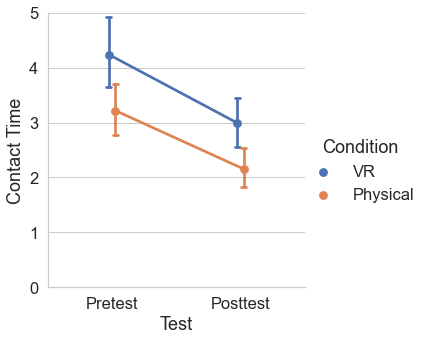

In [63]:

sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
ax = sns.catplot(x='Test', y='Contact Time', dodge = True, hue= 'Condition', kind="point", data=contact_time_df_long, capsize=.04, palette=sns.color_palette())
ax.set(ylim=(0.0, 5.0))

In [44]:
task_time_df = combined_results_df[['Pretest_Time', 'Posttest_Time', 'Condition']].copy()
task_time_df.rename(columns={'Pretest_Time': 'Pretest', 'Posttest_Time': 'Posttest'}, inplace=True)
task_time_df_long = task_time_df.melt(id_vars=['Condition'], var_name='Test', value_name='Task Completion Time')
task_time_df_long.head()

,Condition,Test,Task Completion Time
0,VR,Pretest,24.540540
1,VR,Pretest,36.800053
2,VR,Pretest,37.060505
3,VR,Pretest,27.061413
4,VR,Pretest,39.901130


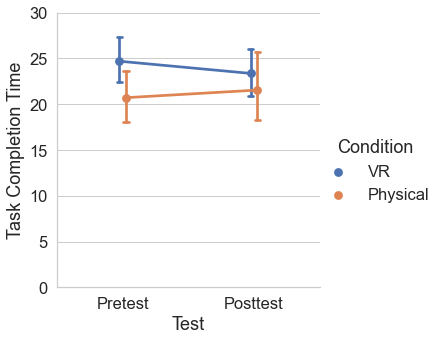

In [53]:
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
ax = sns.catplot(x='Test', y='Task Completion Time', dodge = True, hue= 'Condition', kind="point", data=task_time_df_long, capsize=.04)
ax.set(ylim=(0.0, 30.0))

C:\Users\au657021\AppData\Local\Temp\ipykernel_5636\274959246.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), fontsize = 26)


[Text(0, 0.0, '0.0'),
 Text(0, 2.5, '2.5'),
 Text(0, 5.0, '5.0'),
 Text(0, 7.5, '7.5'),
 Text(0, 10.0, '10.0'),
 Text(0, 12.5, '12.5'),
 Text(0, 15.0, '15.0'),
 Text(0, 17.5, '17.5'),
 Text(0, 20.0, '20.0'),
 Text(0, 22.5, '22.5')]

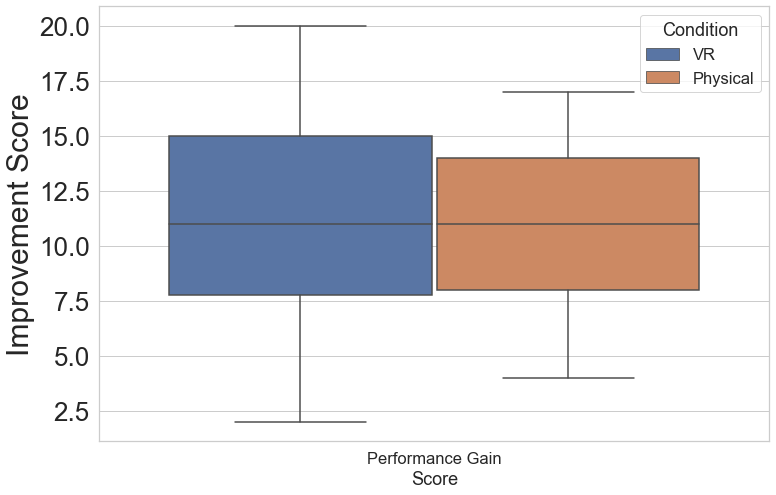

In [71]:
performance_score_df = combined_results_df[['Combined Performance Score', 'Condition']].copy()
performance_score_df.rename(columns={'Combined Performance Score': 'Performance Gain'}, inplace=True)
performance_score_df_long = performance_score_df.melt(id_vars=['Condition'], var_name='Score', value_name='Combined Performance Score')
performance_score_df_long.head()
sns.set(rc={'figure.figsize':(12,8)}, font_scale=1.5, style='whitegrid')
p = sns.boxplot(x="Score", y="Combined Performance Score", hue="Condition", data=performance_score_df_long)
plt.legend(loc='upper right', title='Condition')
p.set_ylabel("Improvement Score", fontsize = 30)
p.set_yticklabels(p.get_yticks(), fontsize = 26)
#p.set_xticklabels(p.get_yticks(), fontsize = 30)



In [109]:
#sns.set()
#sns.boxplot(x="Condition", y="Combined Performance Score", hue="Condition", data=performance_score_df_long)


# __Arousal (Biosignals)__ 
-----------------

Literature (HRV)
---
__An Overview of Heart Rate Variability Metrics and Norms__

Lower HF power is correlated with stress, panic, anxiety, or worry. (Shaffer 2017)
The SDNN is more accurate when calculated over 24 h than during the shorter periods monitored during biofeedback sessions.
pnn50 is correlated with the RMSSD and HF power. However, the RMSSD typically provides a better assessment of RSA (especially in older subjects) and most researchers prefer it to the pNN50 (35). This may be a more reliable index than short-term SDNN measurements for the brief samples used in biofeedback.

Shaffer, F., & Ginsberg, J. P. (2017). An Overview of Heart Rate Variability Metrics and Norms. Frontiers in public health, 5, 258. https://doi.org/10.3389/fpubh.2017.00258


__Perceived Mental Stress and Reactions in Heart Rate Variability—A Pilot Study Among Employees of an Electronics Company__

The root mean square of differences between successive rhythm-to-rhythm (RR) intervals
(RMSSD) describes short-term HR variations. A low value indicates high stress.

High LF indicates high stress and high HF indicates low stress.

Reetta Orsila, Matti Virtanen, Tiina Luukkaala, Mika Tarvainen, Pasi Karjalainen, Jari Viik, Minna Savinainen & Clas-Håkan Nygård (2008) Perceived Mental Stress and Reactions in Heart Rate Variability—A Pilot Study Among Employees of an Electronics Company, International Journal of Occupational Safety and Ergonomics, 14:3, 275-283, DOI: 10.1080/10803548.2008.11076767

__Analysis of Physiological Responses to a Social Situation in an Immersive Virtual Environment__

If the LF component is divided by the total power of the power spectrum then it can be seen to be mainly modulated by the sympathetic system (Task Force). The ratio [[LF/HF]] describes the balanced behavior of the sympathetic and parasympathetic systems. Low frequency components (LF, 0.1 Hz) and high frequency components (HF, 0.15–0.4 Hz) indicate mental stress when the LF component is increased and the HF component is decreased. During dynamic exercise the heart rate changes but the HF component does not change significantly.



Literature (GSR)
---

__Human–virtual character interaction: Toward understanding the influence of haptic feedback__

To determine GSR count, we measured the number of GSR peaks within the appropriate 1- to 5-s poststimulus time frame to determine event-related GSR, as this is the best way to determine direct measurements of arousal. We also computed the average GSR amplitude of all peaks during virtual character interaction in order to determine intensity of physiological arousal. Additionally, we explored intensity of arousal upon the first virtual character interaction. 

__Measuring presence in video games: An investigation of the potential use of physiological measures as indicators of presence__

In the present study, the overall GSR measurements of [[peaks/min]] detected during the video game stimulus was used as an operational measure of presence
Average GSR [peak amplitude](https://www.sciencedirect.com/topics/engineering/peak-amplitude "Learn more about peak amplitude from ScienceDirect's AI-generated Topic Pages"), i.e. the intensity of arousal peaks, was used as an overall measure to further examine the connection between presence and response magnitude.

-----------------------------------

## __Arousal (Biosignals) - Physical x VR__ 

Biosensor data in the form of GSR signals (from the Shimmer) and HR signals (from the polar H10) recorded during the training phase are both normalized to the baseline data using the following formulas inspired by Wiederhold et al. [25] - 
Normalized HR = (Mean HR – MeanBaseline HR) / MeanBaseline HR
Normalized GSR = (Mean GSR – MeanBaseline GSR) / MeanBaseline GSR
The mean GSR across all training levels in the VR condition is 2.7 (microsiemens), which is lower than the mean GSR from the physical condition, 3.32. However this difference is not statistically significant (α = 0.05, p = 0.127, U = 542). The mean HR across all training levels in the VR condition is 73.21, which is slightly lower than the mean HR of the physical condition. This different is also not statistically significant (α = 0.05, p = 0.297, U = 596).


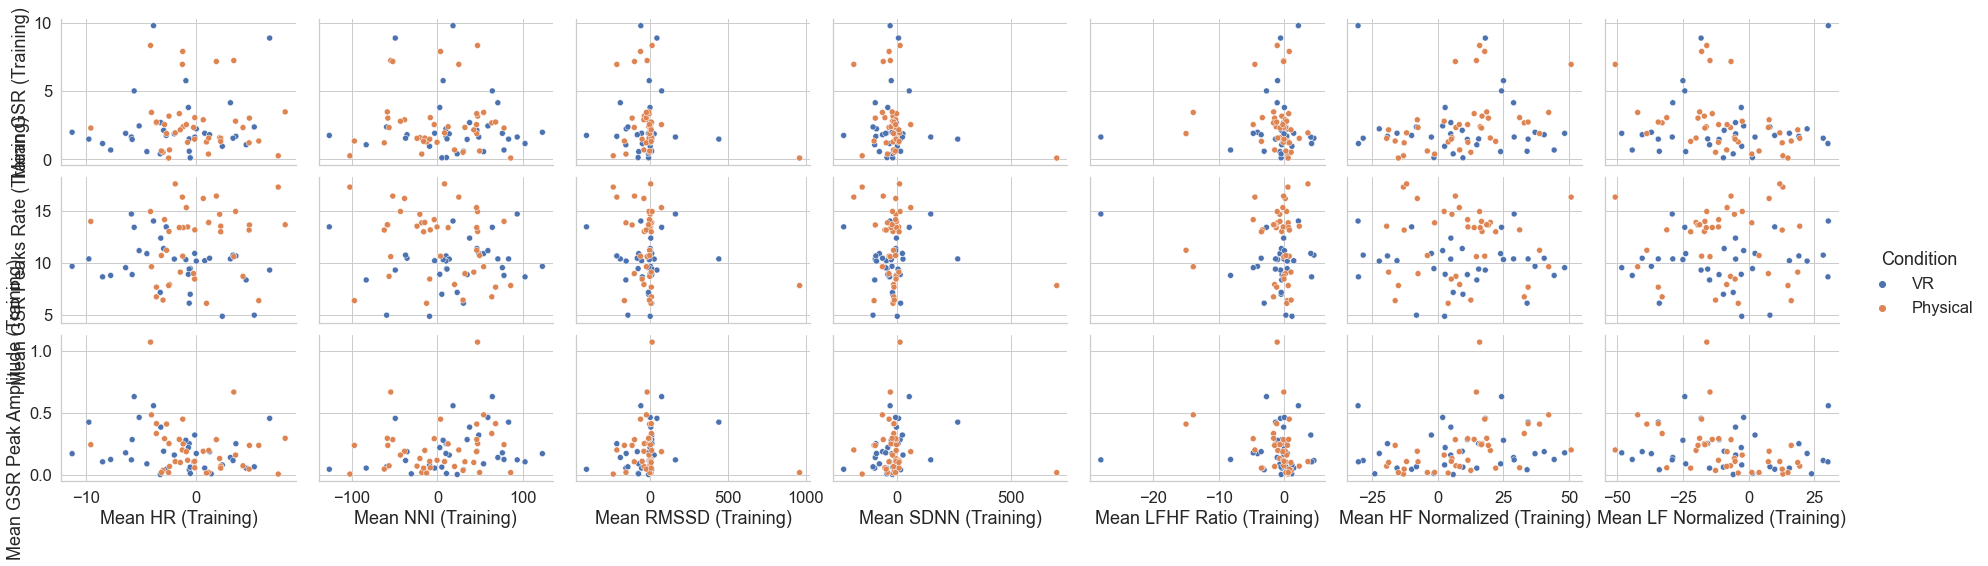

In [110]:
sns.pairplot(
    combined_results_df,
    x_vars=['Mean HR (Training)', 'Mean NNI (Training)', "Mean RMSSD (Training)", "Mean SDNN (Training)", "Mean LFHF Ratio (Training)", "Mean HF Normalized (Training)", "Mean LF Normalized (Training)"],
    y_vars=["Mean GSR (Training)", "Mean GSR Peaks Rate (Training)", "Mean GSR Peak Amplitude (Training)"],
    aspect=1.5,
    hue='Condition'
)

In [112]:
print('HR \n-----')
#Mean HR
print("\nMean of HR in physical vs VR condition")
print(round(ph_results_df['Mean HR (Training)'].mean(skipna=True),2), round(vr_results_df['Mean HR (Training)'].mean(skipna=True),2))
#print(round(ph_results_df['Mean HR (Training)'].median(skipna=True),2), round(vr_results_df['Mean HR (Training)'].median(skipna=True),2))
print(round(ph_results_df['Mean HR (Training)'].std(skipna=True),2), round(vr_results_df['Mean HR (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean HR (Training)'].dropna(), y=vr_results_df['Mean HR (Training)'].dropna(), alternative = 'greater'))
#Levene's test for equal variance for HR in physical condition and VR condition
print("\nLevene's test for equal variance for HR in physical condition and VR condition")
print(stats.levene(ph_results_df['Mean HR (Training)'].dropna() ,vr_results_df['Mean HR (Training)'].dropna()))
#t-test
print("\nT-test for HR in physical vs VR")
print(pg.ttest(ph_results_df['Mean HR (Training)'], vr_results_df['Mean HR (Training)'], paired=False, correction=True, alternative='greater'))

#Mean NNI
print("\nMean of NNI in physical vs VR condition")
print(round(ph_results_df['Mean NNI (Training)'].mean(skipna=True),2), round(vr_results_df['Mean NNI (Training)'].mean(skipna=True),2))
#print(round(ph_results_df['Mean NNI (Training)'].median(skipna=True),2), round(vr_results_df['Mean NNI (Training)'].median(skipna=True),2))
print(round(ph_results_df['Mean NNI (Training)'].std(skipna=True),2), round(vr_results_df['Mean NNI (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean NNI (Training)'].dropna(), y=vr_results_df['Mean NNI (Training)'].dropna(), alternative = 'less'))
#levene's test for equal variance for NNI in physical condition and VR condition
print("\nLevene's test for equal variance for NNI in physical condition and VR condition")
print(stats.levene(ph_results_df['Mean NNI (Training)'].dropna() ,vr_results_df['Mean NNI (Training)'].dropna()))
#t-test
print("\nT-test for NNI in physical vs VR")
print(pg.ttest(ph_results_df['Mean NNI (Training)'], vr_results_df['Mean NNI (Training)'], paired=False, correction=True, alternative='less'))


#RMSSD
print("\nMean of RMSSD in physical vs VR condition")
print(round(ph_results_df['Mean RMSSD (Training)'].mean(skipna=True),2), round(vr_results_df['Mean RMSSD (Training)'].mean(skipna=True),2))
print(round(ph_results_df['Mean RMSSD (Training)'].median(skipna=True),2), round(vr_results_df['Mean RMSSD (Training)'].median(skipna=True),2))
print(round(ph_results_df['Mean RMSSD (Training)'].std(skipna=True),2), round(vr_results_df['Mean RMSSD (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean RMSSD (Training)'].dropna(), y=vr_results_df['Mean RMSSD (Training)'].dropna(), alternative = 'greater')) 

#SDNN
print("\nMean of SDNN in physical vs VR condition")
print(round(ph_results_df['Mean SDNN (Training)'].mean(skipna=True),2), round(vr_results_df['Mean SDNN (Training)'].mean(skipna=True),2))
print(round(ph_results_df['Mean SDNN (Training)'].median(skipna=True),2), round(vr_results_df['Mean SDNN (Training)'].median(skipna=True),2))
print(round(ph_results_df['Mean SDNN (Training)'].std(skipna=True),2), round(vr_results_df['Mean SDNN (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean SDNN (Training)'].dropna(), y=vr_results_df['Mean SDNN (Training)'].dropna(), alternative = 'greater') )

#LF/HF ratio
print("\nMean of LF/HF Ratio in physical vs VR condition")
print(round(ph_results_df['Mean LFHF Ratio (Training)'].mean(skipna=True),2), round(vr_results_df['Mean LFHF Ratio (Training)'].mean(skipna=True),2))
print(round(ph_results_df['Mean LFHF Ratio (Training)'].median(skipna=True),2), round(vr_results_df['Mean LFHF Ratio (Training)'].median(skipna=True),2))
print(round(ph_results_df['Mean LFHF Ratio (Training)'].std(skipna=True),2), round(vr_results_df['Mean LFHF Ratio (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean LFHF Ratio (Training)'].dropna(), y=vr_results_df['Mean LFHF Ratio (Training)'].dropna(), alternative = 'less') )

#HFN
print("\nMean of HFN in physical vs VR condition")
print(round(ph_results_df['Mean HF Normalized (Training)'].mean(skipna=True),2), round(vr_results_df['Mean HF Normalized (Training)'].mean(skipna=True),2))
#print(round(ph_results_df['Mean HF Normalized (Training)'].median(skipna=True),2), round(vr_results_df['Mean HF Normalized (Training)'].median(skipna=True),2))
print(round(ph_results_df['Mean HF Normalized (Training)'].std(skipna=True),2), round(vr_results_df['Mean HF Normalized (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean HF Normalized (Training)'].dropna(), y=vr_results_df['Mean HF Normalized (Training)'].dropna(), alternative = 'greater') )
#Levene's test for equal variance for HFN in physical condition and VR condition
print("\nLevene's test for equal variance for HFN in physical condition and VR condition")
print(stats.levene(ph_results_df['Mean HF Normalized (Training)'].dropna() ,vr_results_df['Mean HF Normalized (Training)'].dropna()))
#t-test
print("\nT-test for HFN in physical vs VR")
print(pg.ttest(ph_results_df['Mean HF Normalized (Training)'], vr_results_df['Mean HF Normalized (Training)'], paired=False, correction=True, alternative='greater'))


#LFN
print("\nMean of LFN in physical vs VR condition")
print(round(ph_results_df['Mean LF Normalized (Training)'].mean(skipna=True),2), round(vr_results_df['Mean LF Normalized (Training)'].mean(skipna=True),2))
#print(round(ph_results_df['Mean LF Normalized (Training)'].median(skipna=True),2), round(vr_results_df['Mean LF Normalized (Training)'].median(skipna=True),2))
print(round(ph_results_df['Mean LF Normalized (Training)'].std(skipna=True),2), round(vr_results_df['Mean LF Normalized (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean LF Normalized (Training)'].dropna(), y=vr_results_df['Mean LF Normalized (Training)'].dropna(), alternative = 'less') )
#Levene's test for equal variance for LFN in physical condition and VR condition
print("\nLevene's test for equal variance for LFN in physical condition and VR condition")
print(stats.levene(ph_results_df['Mean LF Normalized (Training)'].dropna() ,vr_results_df['Mean LF Normalized (Training)'].dropna()))
#t-test
print("\nT-test for LFN in physical vs VR")
print(pg.ttest(ph_results_df['Mean LF Normalized (Training)'], vr_results_df['Mean LF Normalized (Training)'], paired=False, correction=True, alternative='less'))


print('GSR \n-----')
#Mean GSR
print("\nMean of GSR in physical vs VR condition")
print(round(ph_results_df['Mean GSR (Training)'].mean(skipna=True),2), round(vr_results_df['Mean GSR (Training)'].mean(skipna=True),2))
print(round(ph_results_df['Mean GSR (Training)'].median(skipna=True),2), round(vr_results_df['Mean GSR (Training)'].median(skipna=True),2))
print(round(ph_results_df['Mean GSR (Training)'].std(skipna=True),2), round(vr_results_df['Mean GSR (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean GSR (Training)'].dropna(), y=vr_results_df['Mean GSR (Training)'].dropna(), alternative = 'greater'))

#GSR Peak amplitude
print("\nMean of GSR peak amplitude in physical vs VR condition")
print(round(ph_results_df['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2), round(vr_results_df['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2))
print(round(ph_results_df['Mean GSR Peak Amplitude (Training)'].median(skipna=True),2), round(vr_results_df['Mean GSR Peak Amplitude (Training)'].median(skipna=True),2))
print(round(ph_results_df['Mean GSR Peak Amplitude (Training)'].std(skipna=True),2), round(vr_results_df['Mean GSR Peak Amplitude (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean GSR Peak Amplitude (Training)'].dropna(), y=vr_results_df['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'greater') )

#GSR peaks rate
print("\nMean of GSR peaks rate in physical vs VR condition")
print(round(ph_results_df['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2), round(vr_results_df['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2))
print(round(ph_results_df['Mean GSR Peaks Rate (Training)'].median(skipna=True),2), round(vr_results_df['Mean GSR Peaks Rate (Training)'].median(skipna=True),2))
print(round(ph_results_df['Mean GSR Peaks Rate (Training)'].std(skipna=True),2), round(vr_results_df['Mean GSR Peaks Rate (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean GSR Peaks Rate (Training)'].dropna(), y=vr_results_df['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'greater'))

HR 
-----

Mean of HR in physical vs VR condition
0.05 -1.31
3.6 4.29
Statistical significance -  MannwhitneyuResult(statistic=869.0, pvalue=0.14023030196099417)

Levene's test for equal variance for HR in physical condition and VR condition
LeveneResult(statistic=0.9678815045646562, pvalue=0.3283307519630344)

T-test for HR in physical vs VR
               T        dof alternative     p-val         CI95%   cohen-d  \
T-test  1.519888  73.732702     greater  0.066408  [-0.13, inf]  0.344187   

         BF10     power  
T-test  1.271  0.444919  

Mean of NNI in physical vs VR condition
1.33 16.86
48.15 51.73
Statistical significance -  MannwhitneyuResult(statistic=617.0, pvalue=0.07649441913548669)

Levene's test for equal variance for NNI in physical condition and VR condition
LeveneResult(statistic=0.03010111613495643, pvalue=0.8627222707423245)

T-test for NNI in physical vs VR
               T        dof alternative     p-val         CI95%   cohen-d  \
T-test -1.372222  75.613452  

In [60]:
#Counts
print(ph_results_df.notna().sum())
print(vr_results_df.notna().sum())

Participant_ID                        42
Baseline_HR                           39
Baseline_GSR                          39
Baseline_GSR_Peaks_Rate               39
Baseline_GSR_Mean_Peak_Amplitude      38
Baseline_RMSSD                        39
Baseline_SDNN                         39
Baseline_Mean_NNI                     39
Baseline_LFN                          39
Baseline_HFN                          39
Baseline_LFHF_Ratio                   39
Pretest_Time                          39
Pretest_Mistake_Time                  39
Pretest_GSR                           39
Pretest_HR                            39
Pretest_RMSSD                         39
Pretest_SDNN                          39
Pretest_Mean_NNI                      39
Pretest_LFN                           39
Pretest_HFN                           39
Pretest_LFHF_Ratio                    39
Pretest_GSR_Peaks_Rate                39
Pretest_GSR_Mean_Peak_Amplitude       39
Level_1_Time                          39
Level_1_Mistake_

In [29]:
ph_results_df['Mean RMSSD (Training)'].describe()

count     39.000000
mean      -8.595631
std      172.056975
min     -235.980565
25%      -39.054716
50%       -5.897776
75%        3.753859
max      961.007901
Name: Mean RMSSD (Training), dtype: float64

## __Arousal (Biosignals) x Performance__

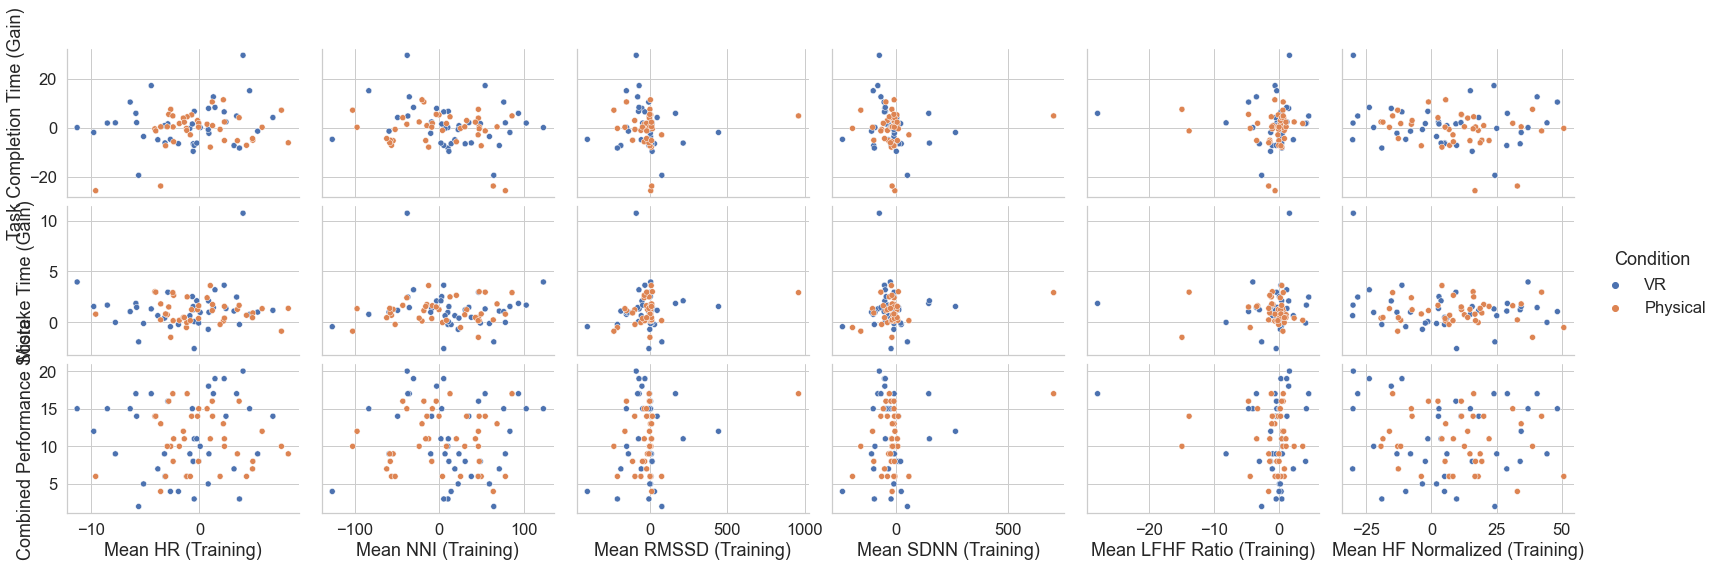

In [112]:
sns.pairplot(
    combined_results_df,
    x_vars=['Mean HR (Training)', 'Mean NNI (Training)', "Mean RMSSD (Training)", "Mean SDNN (Training)", "Mean LFHF Ratio (Training)", "Mean HF Normalized (Training)"],
    y_vars=["Task Completion Time (Gain)", "Mistake Time (Gain)", "Combined Performance Score"],
    aspect=1.5,
    hue='Condition'
) 

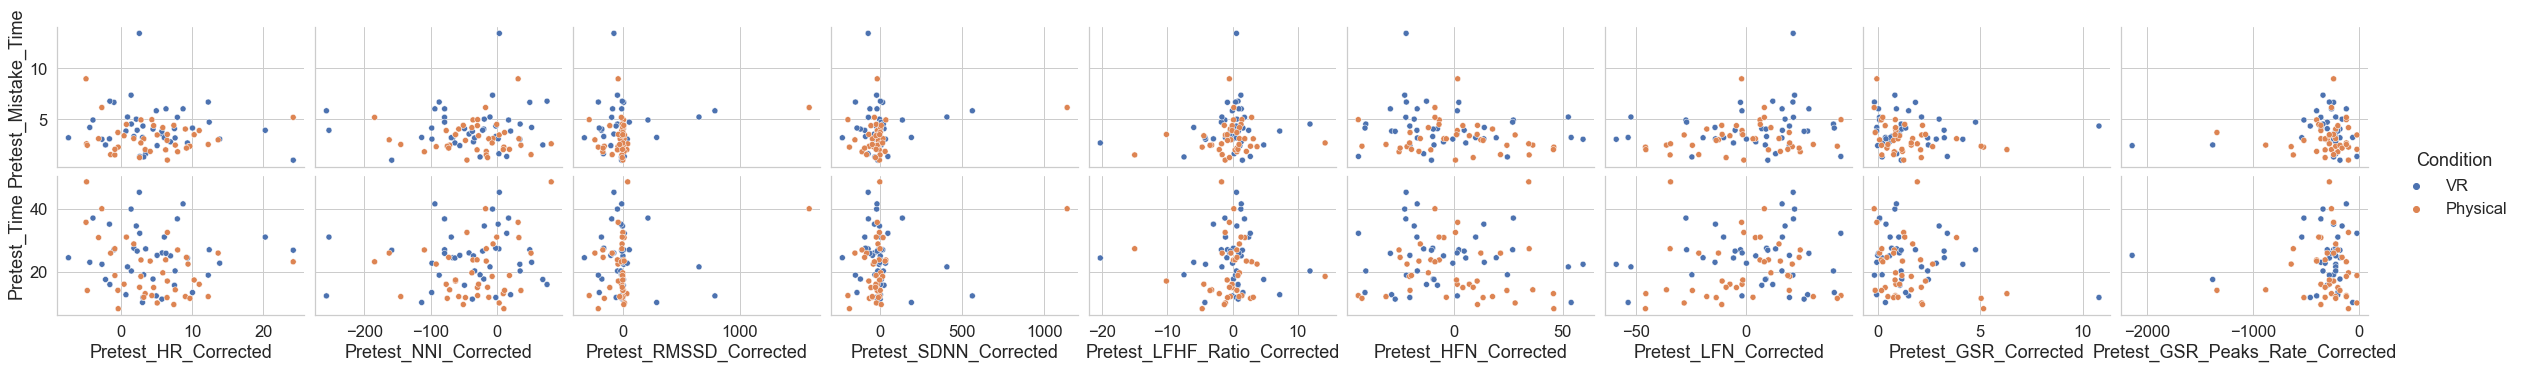

In [113]:
sns.pairplot(
    combined_results_df,
    x_vars=['Pretest_HR_Corrected', 'Pretest_NNI_Corrected', 'Pretest_RMSSD_Corrected', 'Pretest_SDNN_Corrected', 'Pretest_LFHF_Ratio_Corrected', 'Pretest_HFN_Corrected', 'Pretest_LFN_Corrected', 'Pretest_GSR_Corrected', 'Pretest_GSR_Peaks_Rate_Corrected'],
    y_vars=["Pretest_Mistake_Time", "Pretest_Time"],
    aspect=1.5,
    hue='Condition'
) 

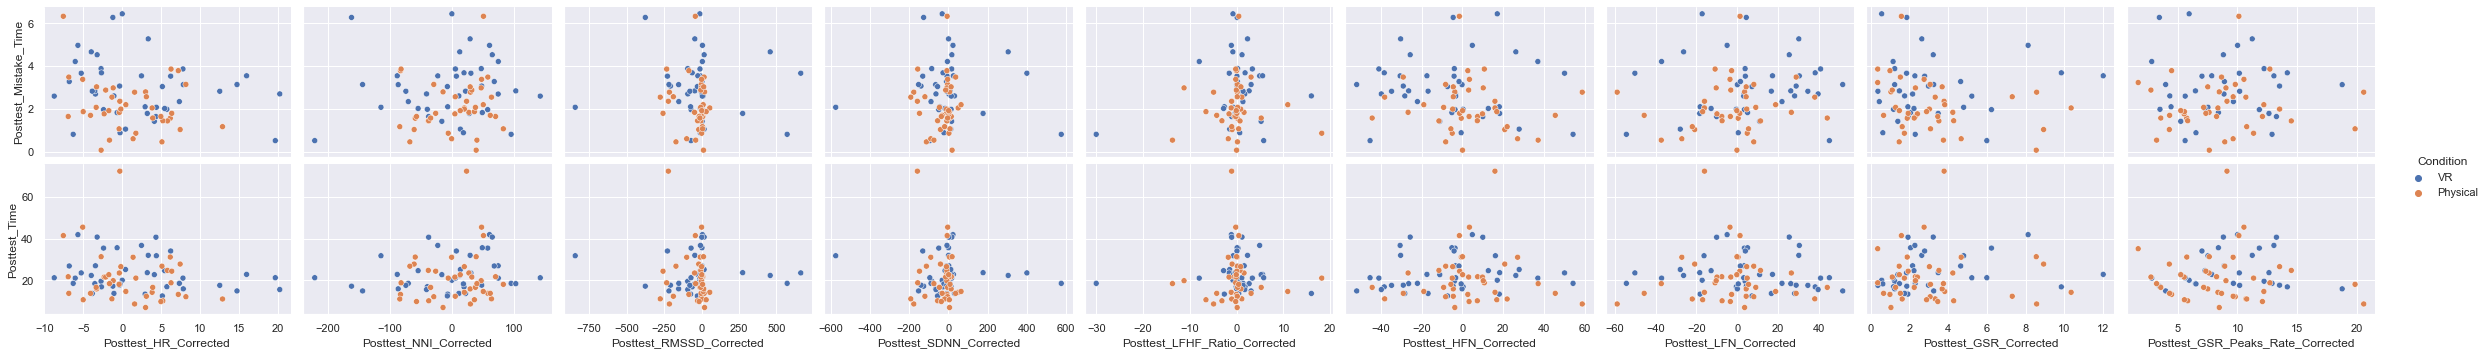

In [132]:
sns.pairplot(
    combined_results_df,
    x_vars=['Posttest_HR_Corrected', 'Posttest_NNI_Corrected', 'Posttest_RMSSD_Corrected', 'Posttest_SDNN_Corrected', 'Posttest_LFHF_Ratio_Corrected', 'Posttest_HFN_Corrected', 'Posttest_LFN_Corrected', 'Posttest_GSR_Corrected', 'Posttest_GSR_Peaks_Rate_Corrected'],
    y_vars=["Posttest_Mistake_Time", "Posttest_Time"],
    aspect=1.5,
    hue='Condition'
)

In [30]:
#combined_results_df.Pretest_GSR_Peaks_Rate_Corrected

In [61]:
print(stats.spearmanr(combined_results_df['Mean HR (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean RMSSD (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean SDNN (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean LFHF Ratio (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean HF Normalized (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR Peaks Rate (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR Peak Amplitude (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))


SpearmanrResult(correlation=0.05806810274164827, pvalue=0.6135657652886772)
SpearmanrResult(correlation=-0.0399971164112598, pvalue=0.7280797904376812)
SpearmanrResult(correlation=-0.0784217399769279, pvalue=0.49494048842826954)
SpearmanrResult(correlation=0.037524244597627696, pvalue=0.7442961245274491)
SpearmanrResult(correlation=-0.05719308656143998, pvalue=0.6189296000008766)
SpearmanrResult(correlation=-0.017470090720744284, pvalue=0.8841934917538342)
SpearmanrResult(correlation=-0.19412043497395937, pvalue=0.099839107899396)
SpearmanrResult(correlation=-0.1633122792768376, pvalue=0.17046216769073755)


In [63]:
print(stats.spearmanr(combined_results_df['Mean HR (Training)'], combined_results_df['Mistake Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean RMSSD (Training)'], combined_results_df['Mistake Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean SDNN (Training)'], combined_results_df['Mistake Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean LFHF Ratio (Training)'], combined_results_df['Mistake Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean HF Normalized (Training)'], combined_results_df['Mistake Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR Peaks Rate (Training)'], combined_results_df['Mistake Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR Peak Amplitude (Training)'], combined_results_df['Mistake Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR (Training)'], combined_results_df['Mistake Time (Gain)'], nan_policy='omit'))

SpearmanrResult(correlation=0.018146410551473844, pvalue=0.8747009053403167)
SpearmanrResult(correlation=0.13094500436272588, pvalue=0.2531499212987684)
SpearmanrResult(correlation=0.03053908117199256, pvalue=0.7906850036576806)
SpearmanrResult(correlation=-0.05904222359918562, pvalue=0.6076181896442545)
SpearmanrResult(correlation=-0.0018589005930778081, pvalue=0.9871128775201717)
SpearmanrResult(correlation=-0.16097498231397514, pvalue=0.1767464597000943)
SpearmanrResult(correlation=-0.05362211526595088, pvalue=0.6523035175573194)
SpearmanrResult(correlation=0.0037301434175831243, pvalue=0.9751918069990191)


In [64]:
print(stats.spearmanr(combined_results_df['Mean HR (Training)'], combined_results_df['Task Completion Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean RMSSD (Training)'], combined_results_df['Task Completion Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean SDNN (Training)'], combined_results_df['Task Completion Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean LFHF Ratio (Training)'], combined_results_df['Task Completion Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean HF Normalized (Training)'], combined_results_df['Task Completion Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR Peaks Rate (Training)'], combined_results_df['Task Completion Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR Peak Amplitude (Training)'], combined_results_df['Task Completion Time (Gain)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR (Training)'], combined_results_df['Task Completion Time (Gain)'], nan_policy='omit'))

SpearmanrResult(correlation=0.09313471338787793, pvalue=0.4173493633104006)
SpearmanrResult(correlation=-0.2071219919321185, pvalue=0.06883462924464885)
SpearmanrResult(correlation=-0.16698491382035685, pvalue=0.14394908422448946)
SpearmanrResult(correlation=0.15388409059295136, pvalue=0.17857589217496042)
SpearmanrResult(correlation=-0.12178960280226103, pvalue=0.2881399843759726)
SpearmanrResult(correlation=0.11412309473278023, pvalue=0.3398093252422152)
SpearmanrResult(correlation=-0.23991114402073305, pvalue=0.040915604801328366)
SpearmanrResult(correlation=-0.23869702231654769, pvalue=0.043460867927263364)


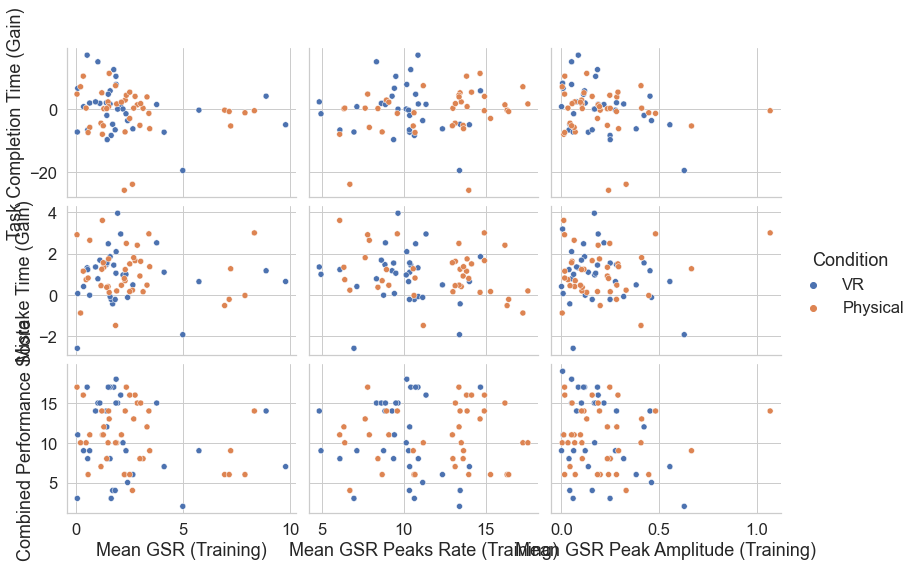

In [117]:
sns.pairplot(
    combined_results_df,
    x_vars=["Mean GSR (Training)", "Mean GSR Peaks Rate (Training)", "Mean GSR Peak Amplitude (Training)"],
    y_vars=["Task Completion Time (Gain)", "Mistake Time (Gain)", "Combined Performance Score"],
    aspect=1.5,
    hue='Condition'
) 

In [118]:
print(stats.spearmanr(combined_results_df['Mean GSR Peaks Rate (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR Peak Amplitude (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))



SpearmanrResult(correlation=-0.017470090720744284, pvalue=0.8841934917538342)
SpearmanrResult(correlation=-0.19412043497395937, pvalue=0.099839107899396)
SpearmanrResult(correlation=-0.1633122792768376, pvalue=0.17046216769073755)


## __Arousal (Biosignals) x High Performance Gain vs Low Performance Gain groups__

### __Mistake Time Gain x Arousal (Combined)__

In [120]:
#High vs low performance groups w.r.t mistake gain 
print('High vs low performance groups w.r.t mistake time gain \n--------------------------------------------------------------')
combined_results_df_high_mistake_gain = combined_results_df[combined_results_df['Mistake Time (Gain)'] > combined_results_df['Mistake Time (Gain)'].quantile(0.75)]
#print(len(combined_results_df_high_mistake_gain))
combined_results_df_low_mistake_gain = combined_results_df[combined_results_df['Mistake Time (Gain)'] < combined_results_df['Mistake Time (Gain)'].quantile(0.25)]
#print(len(combined_results_df_low_mistake_gain))

print('HR \n-----')
#HR
print("\nMean of HR in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean HR (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean HR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean HR (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean HR (Training)'].dropna(), alternative = 'less')) 


#NNI
print("\nMean of NNI in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean NNI (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean NNI (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean NNI (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean NNI (Training)'].dropna(), alternative = 'greater'))

#RMSSD
print("\nMean of RMSSD in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean RMSSD (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean RMSSD (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean RMSSD (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean RMSSD (Training)'].dropna(), alternative = 'greater')) 

#SDNN
print("\nMean of SDNN in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean SDNN (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean SDNN (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean SDNN (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean SDNN (Training)'].dropna(), alternative = 'less')) 

#HFN
print("\nMean of HFN in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean HF Normalized (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean HF Normalized (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean HF Normalized (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean HF Normalized (Training)'].dropna(), alternative = 'less'))

#LF/HF ratio
print("\nMean of LF/HF Ratio in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean LFHF Ratio (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean LFHF Ratio (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean LFHF Ratio (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean LFHF Ratio (Training)'].dropna(), alternative = 'greater')) 

print('\nGSR \n-----')
#GSR
print("\nMean of GSR in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean GSR (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean GSR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean GSR (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean GSR (Training)'].dropna(), alternative = 'less'))

#GSR Peak amplitude
print("\nMean of GSR Peak Amplitude in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean GSR Peak Amplitude (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'less'))

#GSR peaks rate
print("\nMean of GSR peaks rate in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean GSR Peaks Rate (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'less')) 

#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Mistake_Gain'], nan_policy='omit'))
#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Time_Gain'], nan_policy='omit'))

High vs low performance groups w.r.t mistake time gain 
--------------------------------------------------------------
HR 
-----

Mean of HR in high vs low mistake gain groups
-1.61 -0.96
Statistical significance -  MannwhitneyuResult(statistic=184.0, pvalue=0.4385933043720593)

Mean of NNI in high vs low mistake gain groups
24.3 9.72
Statistical significance -  MannwhitneyuResult(statistic=194.0, pvalue=0.46083055876149265)

Mean of RMSSD in high vs low mistake gain groups
48.2 -60.86
Statistical significance -  MannwhitneyuResult(statistic=227.0, pvalue=0.1525491699160536)

Mean of SDNN in high vs low mistake gain groups
26.64 -38.34
Statistical significance -  MannwhitneyuResult(statistic=202.0, pvalue=0.6372882262884444)

Mean of HFN in high vs low mistake gain groups
3.08 8.9
Statistical significance -  MannwhitneyuResult(statistic=163.0, pvalue=0.22826110156234297)

Mean of LF/HF Ratio in high vs low mistake gain groups
-1.9 -1.17
Statistical significance -  MannwhitneyuResult(st

### __Task time Gain x Arousal (Combined)__


In [121]:
#High vs low performance groups w.r.t task completion time gain 
print('High vs low performance groups w.r.t task completion time gain \n--------------------------------------------------------------')
combined_results_df_high_task_time_gain = combined_results_df[combined_results_df['Task Completion Time (Gain)'] > combined_results_df['Task Completion Time (Gain)'].quantile(0.75)]
print(len(combined_results_df_high_task_time_gain))
combined_results_df_low_task_time_gain = combined_results_df[combined_results_df['Task Completion Time (Gain)'] < combined_results_df['Task Completion Time (Gain)'].quantile(0.25)]
print(len(combined_results_df_low_task_time_gain))

print('HR \n-----')
#HR
print("Mean of HR in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean HR (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean HR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean HR (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean HR (Training)'].dropna(), alternative = 'greater')) 

#NNI
print("\nMean of NNI in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean NNI (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean NNI (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean NNI (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean NNI (Training)'].dropna(), alternative = 'less'))

#RMSSD
print("\nMean of RMSSD in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean RMSSD (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean RMSSD (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean RMSSD (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean RMSSD (Training)'].dropna(), alternative = 'less')) 

#SDNN
print("\nMean of SDNN in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean SDNN (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean SDNN (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean SDNN (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean SDNN (Training)'].dropna(), alternative = 'less')) 

#HFN
print("\nMean of HFN in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean HF Normalized (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean HF Normalized (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean HF Normalized (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean HF Normalized (Training)'].dropna(), alternative = 'less'))

#LF/HF ratio
print("\nMean of LF/HF Ratio in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean LFHF Ratio (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean LFHF Ratio (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean LFHF Ratio (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean LFHF Ratio (Training)'].dropna(), alternative = 'less')) 

print('\nGSR \n-----')
#GSR
print("\nMean of GSR in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean GSR (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean GSR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean GSR (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean GSR (Training)'].dropna(), alternative = 'less'))

#GSR Peak amplitude
print("\nMean of GSR Peak Amplitude in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean GSR Peak Amplitude (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'less'))

#GSR peaks rate
print("\nMean of GSR peaks rate in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean GSR Peaks Rate (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'greater')) 

#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Mistake_Gain'], nan_policy='omit'))
#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Time_Gain'], nan_policy='omit'))



High vs low performance groups w.r.t task completion time gain 
--------------------------------------------------------------
20
20
HR 
-----
Mean of HR in high vs low task time gain groups
0.1 -0.2
Statistical significance -  MannwhitneyuResult(statistic=195.0, pvalue=0.4496921826938215)

Mean of NNI in high vs low task time gain groups
0.47 10.85
Statistical significance -  MannwhitneyuResult(statistic=158.0, pvalue=0.18805847068288312)

Mean of RMSSD in high vs low task time gain groups
3.72 -14.35
Statistical significance -  MannwhitneyuResult(statistic=125.0, pvalue=0.03497042568111427)

Mean of SDNN in high vs low task time gain groups
2.19 -10.3
Statistical significance -  MannwhitneyuResult(statistic=127.0, pvalue=0.039535804425378226)

Mean of HFN in high vs low task time gain groups
5.31 10.85
Statistical significance -  MannwhitneyuResult(statistic=161.0, pvalue=0.2116292581233329)

Mean of LF/HF Ratio in high vs low task time gain groups
-2.54 -0.8
Statistical significance

### __Performance Improvement x Arousal (Combined)__

In [90]:
#High vs low performance groups w.r.t performance score 
print('High vs low performance groups w.r.t performance score \n--------------------------------------------------------------')
high_performance_df = combined_results_df[combined_results_df['Combined Performance Score'] > combined_results_df['Combined Performance Score'].quantile(0.75)]
print(len(high_performance_df))
low_performance_df = combined_results_df[combined_results_df['Combined Performance Score'] < combined_results_df['Combined Performance Score'].quantile(0.25)]
print(len(low_performance_df))

print('HR \n-----')
#HR
print("\nMean of HR in high vs low performance groups")
print(round(high_performance_df['Mean HR (Training)'].mean(skipna=True),2), round(low_performance_df['Mean HR (Training)'].mean(skipna=True),2))
print(round(high_performance_df['Mean HR (Training)'].std(skipna=True),2), round(low_performance_df['Mean HR (Training)'].std(skipna=True),2))
#t-test
print('Statistical significance - ', stats.ttest_ind(a=high_performance_df['Mean HR (Training)'].dropna(), b=low_performance_df['Mean HR (Training)'].dropna(), equal_var=False, alternative='greater'))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean HR (Training)'].dropna(), y=low_performance_df['Mean HR (Training)'].dropna(), alternative = 'greater'))


#NNI
print("\nMean of NNI in high vs low performance groups")
print(round(high_performance_df['Mean NNI (Training)'].mean(skipna=True),2), round(low_performance_df['Mean NNI (Training)'].mean(skipna=True),2))
print(round(high_performance_df['Mean NNI (Training)'].std(skipna=True),2), round(low_performance_df['Mean NNI (Training)'].std(skipna=True),2))
#t-test
print('Statistical significance - ', stats.ttest_ind(a=high_performance_df['Mean NNI (Training)'].dropna(), b=low_performance_df['Mean NNI (Training)'].dropna(), equal_var=False, alternative='less'))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean NNI (Training)'].dropna(), y=low_performance_df['Mean NNI (Training)'].dropna(), alternative = 'less'))

#RMSSD
print("\nMean of RMSSD in high vs low performance groups")
print(round(high_performance_df['Mean RMSSD (Training)'].mean(skipna=True),2), round(low_performance_df['Mean RMSSD (Training)'].mean(skipna=True),2))
print(round(high_performance_df['Mean RMSSD (Training)'].std(skipna=True),2), round(low_performance_df['Mean RMSSD (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean RMSSD (Training)'].dropna(), y=low_performance_df['Mean RMSSD (Training)'].dropna(), alternative = 'greater'))
print('Statistical significance - \n', pg.mwu(x=high_performance_df['Mean RMSSD (Training)'].dropna(), y=low_performance_df['Mean RMSSD (Training)'].dropna(), alternative = 'greater'))

#SDNN
print("\nMean of SDNN in high vs low performance groups")
print(round(high_performance_df['Mean SDNN (Training)'].mean(skipna=True),2), round(low_performance_df['Mean SDNN (Training)'].mean(skipna=True),2))
print(round(high_performance_df['Mean SDNN (Training)'].std(skipna=True),2), round(low_performance_df['Mean SDNN (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean SDNN (Training)'].dropna(), y=low_performance_df['Mean SDNN (Training)'].dropna(), alternative = 'greater'))

#HFN
print("\nMean of HFN in high vs low performance groups")
print(round(high_performance_df['Mean HF Normalized (Training)'].mean(skipna=True),2), round(low_performance_df['Mean HF Normalized (Training)'].mean(skipna=True),2))
print(round(high_performance_df['Mean HF Normalized (Training)'].std(skipna=True),2), round(low_performance_df['Mean HF Normalized (Training)'].std(skipna=True),2))
#t-test
print('Statistical significance - ', stats.ttest_ind(a=high_performance_df['Mean HF Normalized (Training)'].dropna(), b=low_performance_df['Mean HF Normalized (Training)'].dropna(), equal_var=False, alternative='less'))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean HF Normalized (Training)'].dropna(), y=low_performance_df['Mean HF Normalized (Training)'].dropna(), alternative = 'less'))

#LF/HF ratio
print("\nMean of LF/HF ratio in high vs low performance groups")
print(round(high_performance_df['Mean LFHF Ratio (Training)'].mean(skipna=True),2), round(low_performance_df['Mean LFHF Ratio (Training)'].mean(skipna=True),2))
print(round(high_performance_df['Mean LFHF Ratio (Training)'].std(skipna=True),2), round(low_performance_df['Mean LFHF Ratio (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean LFHF Ratio (Training)'].dropna(), y=low_performance_df['Mean LFHF Ratio (Training)'].dropna(), alternative = 'less'))

print('\nGSR \n-----')
#GSR
print("\nMean of GSR in high vs low performance groups")
print(round(high_performance_df['Mean GSR (Training)'].mean(skipna=True),2), round(low_performance_df['Mean GSR (Training)'].mean(skipna=True),2))
print(round(high_performance_df['Mean GSR (Training)'].std(skipna=True),2), round(low_performance_df['Mean GSR (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean GSR (Training)'].dropna(), y=low_performance_df['Mean GSR (Training)'].dropna(), alternative = 'less'))
print('Statistical significance - \n', pg.mwu(x=high_performance_df['Mean GSR (Training)'].dropna(), y=low_performance_df['Mean GSR (Training)'].dropna(), alternative = 'less'))

#GSR Peak amplitude
print("\nMean of GSR Peak Amplitude in high vs low performance groups")
print(round(high_performance_df['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2), round(low_performance_df['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2))
print(round(high_performance_df['Mean GSR Peak Amplitude (Training)'].std(skipna=True),2), round(low_performance_df['Mean GSR Peak Amplitude (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean GSR Peak Amplitude (Training)'].dropna(), y=low_performance_df['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'less'))
print('Statistical significance - \n', pg.mwu(x=high_performance_df['Mean GSR Peak Amplitude (Training)'].dropna(), y=low_performance_df['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'less'))

#GSR peaks rate
print("\nMean of GSR peaks rate in high vs low performance groups")
print(round(high_performance_df['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2), round(low_performance_df['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2))
print(round(high_performance_df['Mean GSR Peaks Rate (Training)'].std(skipna=True),2), round(low_performance_df['Mean GSR Peaks Rate (Training)'].std(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean GSR Peaks Rate (Training)'].dropna(), y=low_performance_df['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'greater'))
print('Statistical significance - \n', pg.mwu(x=high_performance_df['Mean GSR Peaks Rate (Training)'].dropna(), y=low_performance_df['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'greater'))


High vs low performance groups w.r.t performance score 
--------------------------------------------------------------
14
19
HR 
-----

Mean of HR in high vs low performance groups
-0.11 -1.24
3.17 3.76
Statistical significance -  Ttest_indResult(statistic=0.9369966211012922, pvalue=0.17807734944426373)
Statistical significance -  MannwhitneyuResult(statistic=157.0, pvalue=0.19599646734849113)

Mean of NNI in high vs low performance groups
6.17 14.11
46.41 53.97
Statistical significance -  Ttest_indResult(statistic=-0.453095738647276, pvalue=0.32686048707285587)
Statistical significance -  MannwhitneyuResult(statistic=109.0, pvalue=0.19599646734849113)

Mean of RMSSD in high vs low performance groups
38.69 -57.28
274.99 120.41
Statistical significance -  MannwhitneyuResult(statistic=125.0, pvalue=0.6215750993050829)
Statistical significance - 
      U-val alternative     p-val      RBC      CLES
MWU  125.0     greater  0.621575  0.06015  0.469925

Mean of SDNN in high vs low performanc

In [223]:
#Self-efficacy
print("\nMean of self-efficacy gain in high vs low performance groups")
print(round(high_performance_df['Eff_Diff'].mean(skipna=True),2), round(low_performance_df['Eff_Diff'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Eff_Diff'].dropna(), y=low_performance_df['Eff_Diff'].dropna(), alternative = 'less'))


Mean of self-efficacy gain in high vs low performance groups
0.14 0.63
Statistical significance -  MannwhitneyuResult(statistic=100.5, pvalue=0.11378235992504415)


In [82]:

#Find VR and Physical numbers within high and low performance groups
print('\nVR and Physical numbers within high and low performance groups \n--------------------------------------------------------------')
print('High performance group')
print(high_performance_df['Condition'].value_counts())
print('Low performance group')
print(low_performance_df['Condition'].value_counts())



VR and Physical numbers within high and low performance groups 
--------------------------------------------------------------
High performance group
VR          9
Physical    5
Name: Condition, dtype: int64
Low performance group
VR          10
Physical     9
Name: Condition, dtype: int64


In [176]:
#Combine high and low performance groups
#Add column for performance category in high performance and low performance groups
low_performance_df['Performance Category'] = 'Low'
high_performance_df['Performance Category'] = 'High'
combined_results_high_low_df = pd.concat([high_performance_df, low_performance_df])


C:\Users\au657021\AppData\Local\Temp\ipykernel_14312\1615592479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_performance_df['Performance Category'] = 'Low'
C:\Users\au657021\AppData\Local\Temp\ipykernel_14312\1615592479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_performance_df['Performance Category'] = 'High'


#### GSR across test and training in high vs low improvement groups

In [204]:
#high_performance_df.boxplot(column=['Pretest_GSR_Corrected' , 'Level_1_GSR_Corrected', 'Level_2_GSR_Corrected', 'Level_3_GSR_Corrected', 'Level_4_GSR_Corrected', 'Posttest_GSR_Corrected'], figsize=(14,10),showmeans=True)
#ax = high_performance_df.boxplot(column=['Pretest_GSR_Corrected' , 'Mean GSR (Training)', 'Posttest_GSR_Corrected'], figsize=(8,8),showmeans=True)
#ax.set(ylim=(0.0, 11.0))

In [203]:
#low_performance_df.boxplot(column=['Pretest_GSR_Corrected' , 'Level_1_GSR_Corrected', 'Level_2_GSR_Corrected', 'Level_3_GSR_Corrected', 'Level_4_GSR_Corrected', 'Posttest_GSR_Corrected'], figsize=(14,10),showmeans=True)
#ax = low_performance_df.boxplot(column=['Pretest_GSR_Corrected' , 'Mean GSR (Training)', 'Posttest_GSR_Corrected'], figsize=(8,8),showmeans=True)
#ax.set(ylim=(0.0, 11.0))

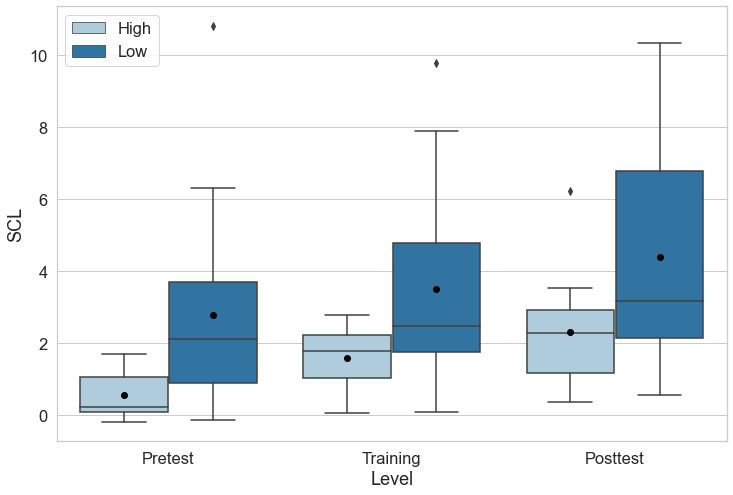

In [218]:
combined_results_hilo_gsr_df = combined_results_high_low_df[['Performance Category', 'Pretest_GSR_Corrected' , 'Mean GSR (Training)', 'Posttest_GSR_Corrected']].copy()
combined_results_hilo_gsr_df.rename(columns={'Pretest_GSR_Corrected': 'Pretest', 'Posttest_GSR_Corrected' : 'Posttest', 'Mean GSR (Training)' : 'Training'}, inplace=True)
#melt combined_results_hilo_gsr_df
combined_results_hilo_gsr_long_df = pd.melt(combined_results_hilo_gsr_df, id_vars=['Performance Category'], var_name= 'Level', value_name='SCL')
combined_results_hilo_gsr_long_df.head()
#print(combined_results_hilo_gsr_melt_df)
sns.set_palette("Paired", 2)
p = sns.boxplot(x="Level", y="SCL", hue="Performance Category", data=combined_results_hilo_gsr_long_df, showmeans=True, meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
plt.legend(loc='upper left', title='')

#### GSR peak amplitude across test and training in high vs low improvement groups

In [201]:
#high_performance_df.boxplot(column=['Pretest_GSR_Mean_Peak_Amplitude' , 'Level_1_GSR_Mean_Peak_Amplitude', 'Level_2_GSR_Mean_Peak_Amplitude', 'Level_3_GSR_Mean_Peak_Amplitude', 'Level_4_GSR_Mean_Peak_Amplitude', 'Posttest_GSR_Mean_Peak_Amplitude'], figsize=(24,10),showmeans=True)
#ax = high_performance_df.boxplot(column=['Pretest_GSR_Mean_Peak_Amplitude' , 'Mean GSR Peak Amplitude (Training)', 'Posttest_GSR_Mean_Peak_Amplitude'], figsize=(12,8),showmeans=True)
#ax.set(ylim=(0.0, 0.7))

In [202]:
#low_performance_df.boxplot(column=['Pretest_GSR_Mean_Peak_Amplitude' , 'Level_1_GSR_Mean_Peak_Amplitude', 'Level_2_GSR_Mean_Peak_Amplitude', 'Level_3_GSR_Mean_Peak_Amplitude', 'Level_4_GSR_Mean_Peak_Amplitude', 'Posttest_GSR_Mean_Peak_Amplitude'], figsize=(24,10),showmeans=True)
#ax = low_performance_df.boxplot(column=['Pretest_GSR_Mean_Peak_Amplitude' , 'Mean GSR Peak Amplitude (Training)', 'Posttest_GSR_Mean_Peak_Amplitude'], figsize=(12,8),showmeans=True)
#ax.set(ylim=(0.0, 0.7))

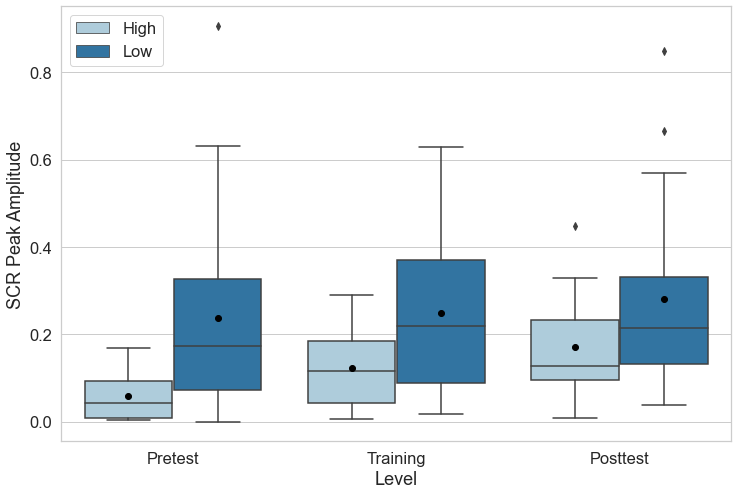

In [219]:
combined_results_hilo_gsrpeaks_df = combined_results_high_low_df[['Performance Category', 'Pretest_GSR_Mean_Peak_Amplitude' , 'Mean GSR Peak Amplitude (Training)', 'Posttest_GSR_Mean_Peak_Amplitude']].copy()
combined_results_hilo_gsrpeaks_df.rename(columns={'Pretest_GSR_Mean_Peak_Amplitude': 'Pretest', 'Posttest_GSR_Mean_Peak_Amplitude' : 'Posttest', 'Mean GSR Peak Amplitude (Training)' : 'Training'}, inplace=True)
#melt combined_results_hilo_gsr_df
combined_results_hilo_gsrpeaks_long_df = pd.melt(combined_results_hilo_gsrpeaks_df, id_vars=['Performance Category'], var_name= 'Level', value_name='SCR Peak Amplitude')
combined_results_hilo_gsrpeaks_long_df.head()
#print(combined_results_hilo_gsr_melt_df)
sns.set_palette("Paired", 2)
p = sns.boxplot(x="Level", y="SCR Peak Amplitude", hue="Performance Category", data=combined_results_hilo_gsrpeaks_long_df, showmeans=True, meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
plt.legend(loc='upper left', title='')

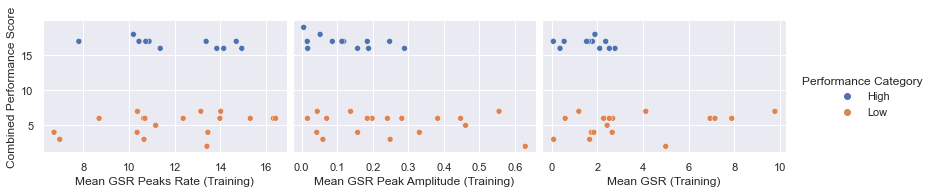

In [131]:
#sns.histplot(data=combined_results_high_low_df, x="Mean GSR Peak Amplitude (Training)", hue="Condition", multiple="stack", bins=20)
sns.set()
sns.pairplot(
    combined_results_high_low_df,
    x_vars=['Mean GSR Peaks Rate (Training)', 'Mean GSR Peak Amplitude (Training)', 'Mean GSR (Training)'],
    y_vars=["Combined Performance Score"],
    aspect=1.5,
    hue='Performance Category'
) 

### __Performance Improvement x Arousal (VR)__

In [85]:
#High vs low performance groups w.r.t performance score 
print('VR - High vs low improvement groups w.r.t performance score \n--------------------------------------------------------------')
vr_high_performance_df = vr_results_df[vr_results_df['Combined Performance Score'] > vr_results_df['Combined Performance Score'].quantile(0.75)]
print(len(vr_high_performance_df))
vr_low_performance_df = vr_results_df[vr_results_df['Combined Performance Score'] < vr_results_df['Combined Performance Score'].quantile(0.25)]
print(len(vr_low_performance_df))

print('HR \n-----')
#HR
print("\nMean of HR in high vs low performance groups")
print(round(vr_high_performance_df['Mean HR (Training)'].mean(skipna=True),2), round(vr_low_performance_df['Mean HR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_high_performance_df['Mean HR (Training)'].dropna(), y=vr_low_performance_df['Mean HR (Training)'].dropna(), alternative = 'greater'))

#NNI
print("\nMean of NNI in high vs low performance groups")
print(round(vr_high_performance_df['Mean NNI (Training)'].mean(skipna=True),2), round(vr_low_performance_df['Mean NNI (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_high_performance_df['Mean NNI (Training)'].dropna(), y=vr_low_performance_df['Mean NNI (Training)'].dropna(), alternative = 'less'))

#RMSSD
print("\nMean of RMSSD in high vs low performance groups")
print(round(vr_high_performance_df['Mean RMSSD (Training)'].mean(skipna=True),2), round(vr_low_performance_df['Mean RMSSD (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_high_performance_df['Mean RMSSD (Training)'].dropna(), y=vr_low_performance_df['Mean RMSSD (Training)'].dropna(), alternative = 'greater'))

#SDNN
print("\nMean of SDNN in high vs low performance groups")
print(round(vr_high_performance_df['Mean SDNN (Training)'].mean(skipna=True),2), round(vr_low_performance_df['Mean SDNN (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_high_performance_df['Mean SDNN (Training)'].dropna(), y=vr_low_performance_df['Mean SDNN (Training)'].dropna(), alternative = 'greater'))

#HFN
print("\nMean of HFN in high vs low performance groups")
print(round(vr_high_performance_df['Mean HF Normalized (Training)'].mean(skipna=True),2), round(vr_low_performance_df['Mean HF Normalized (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_high_performance_df['Mean HF Normalized (Training)'].dropna(), y=vr_low_performance_df['Mean HF Normalized (Training)'].dropna(), alternative = 'less'))

#LF/HF ratio
print("\nMean of LF/HF ratio in high vs low performance groups")
print(round(vr_high_performance_df['Mean LFHF Ratio (Training)'].mean(skipna=True),2), round(vr_low_performance_df['Mean LFHF Ratio (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_high_performance_df['Mean LFHF Ratio (Training)'].dropna(), y=vr_low_performance_df['Mean LFHF Ratio (Training)'].dropna(), alternative = 'less'))

print('\nGSR \n-----')
#GSR
print("\nMean of GSR in high vs low performance groups")
print(round(vr_high_performance_df['Mean GSR (Training)'].mean(skipna=True),2), round(vr_low_performance_df['Mean GSR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_high_performance_df['Mean GSR (Training)'].dropna(), y=vr_low_performance_df['Mean GSR (Training)'].dropna(), alternative = 'less'))

#GSR Peak amplitude
print("\nMean of GSR Peak Amplitude in high vs low performance groups")
print(round(vr_high_performance_df['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2), round(vr_low_performance_df['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_high_performance_df['Mean GSR Peak Amplitude (Training)'].dropna(), y=vr_low_performance_df['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'less'))

#GSR peaks rate
print("\nMean of GSR peaks rate in high vs low performance groups")
print(round(vr_high_performance_df['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2), round(vr_low_performance_df['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=vr_high_performance_df['Mean GSR Peaks Rate (Training)'].dropna(), y=vr_low_performance_df['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'greater'))

VR - High vs low improvement groups w.r.t performance score 
--------------------------------------------------------------
9
10
HR 
-----

Mean of HR in high vs low performance groups
0.01 -1.52
Statistical significance -  MannwhitneyuResult(statistic=57.0, pvalue=0.17387279945534878)

Mean of NNI in high vs low performance groups
5.96 17.43
Statistical significance -  MannwhitneyuResult(statistic=30.0, pvalue=0.11822235778615192)

Mean of RMSSD in high vs low performance groups
-27.56 -77.41
Statistical significance -  MannwhitneyuResult(statistic=42.0, pvalue=0.6124743131649588)

Mean of SDNN in high vs low performance groups
-24.76 -41.79
Statistical significance -  MannwhitneyuResult(statistic=42.0, pvalue=0.6124743131649588)

Mean of HFN in high vs low performance groups
-0.66 1.22
Statistical significance -  MannwhitneyuResult(statistic=42.0, pvalue=0.41912824319291314)

Mean of LF/HF ratio in high vs low performance groups
-2.64 -0.16
Statistical significance -  MannwhitneyuRes

### __Performance Gain x Arousal (Physical)__

In [41]:
#High vs low performance groups w.r.t performance score 
print('Physical - High vs low performance groups w.r.t performance score \n--------------------------------------------------------------')
ph_high_performance_df = ph_results_df[ph_results_df['Combined Performance Score'] > ph_results_df['Combined Performance Score'].quantile(0.75)]
print(len(ph_high_performance_df))
ph_low_performance_df = ph_results_df[ph_results_df['Combined Performance Score'] < ph_results_df['Combined Performance Score'].quantile(0.25)]
print(len(ph_low_performance_df))

print('HR \n-----')
#HR
print("\nMean of HR in high vs low performance groups")
print(round(ph_high_performance_df['Mean HR (Training)'].mean(skipna=True),2), round(ph_low_performance_df['Mean HR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_high_performance_df['Mean HR (Training)'].dropna(), y=ph_low_performance_df['Mean HR (Training)'].dropna(), alternative = 'greater'))

#NNI
print("\nMean of NNI in high vs low performance groups")
print(round(ph_high_performance_df['Mean NNI (Training)'].mean(skipna=True),2), round(ph_low_performance_df['Mean NNI (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_high_performance_df['Mean NNI (Training)'].dropna(), y=ph_low_performance_df['Mean NNI (Training)'].dropna(), alternative = 'less'))

#RMSSD
print("\nMean of RMSSD in high vs low performance groups")
print(round(ph_high_performance_df['Mean RMSSD (Training)'].mean(skipna=True),2), round(ph_low_performance_df['Mean RMSSD (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_high_performance_df['Mean RMSSD (Training)'].dropna(), y=ph_low_performance_df['Mean RMSSD (Training)'].dropna(), alternative = 'greater'))

#SDNN
print("\nMean of SDNN in high vs low performance groups")
print(round(ph_high_performance_df['Mean SDNN (Training)'].mean(skipna=True),2), round(ph_low_performance_df['Mean SDNN (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_high_performance_df['Mean SDNN (Training)'].dropna(), y=ph_low_performance_df['Mean SDNN (Training)'].dropna(), alternative = 'greater'))

#HFN
print("\nMean of HFN in high vs low performance groups")
print(round(ph_high_performance_df['Mean HF Normalized (Training)'].mean(skipna=True),2), round(ph_low_performance_df['Mean HF Normalized (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_high_performance_df['Mean HF Normalized (Training)'].dropna(), y=ph_low_performance_df['Mean HF Normalized (Training)'].dropna(), alternative = 'less'))

#LF/HF ratio
print("\nMean of LF/HF ratio in high vs low performance groups")
print(round(ph_high_performance_df['Mean LFHF Ratio (Training)'].mean(skipna=True),2), round(ph_low_performance_df['Mean LFHF Ratio (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_high_performance_df['Mean LFHF Ratio (Training)'].dropna(), y=ph_low_performance_df['Mean LFHF Ratio (Training)'].dropna(), alternative = 'less'))

print('\nGSR \n-----')
#GSR
print("\nMean of GSR in high vs low performance groups")
print(round(ph_high_performance_df['Mean GSR (Training)'].mean(skipna=True),2), round(ph_low_performance_df['Mean GSR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_high_performance_df['Mean GSR (Training)'].dropna(), y=ph_low_performance_df['Mean GSR (Training)'].dropna(), alternative = 'less'))

#GSR Peak amplitude
print("\nMean of GSR Peak Amplitude in high vs low performance groups")
print(round(ph_high_performance_df['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2), round(ph_low_performance_df['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_high_performance_df['Mean GSR Peak Amplitude (Training)'].dropna(), y=ph_low_performance_df['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'less'))

#GSR peaks rate
print("\nMean of GSR peaks rate in high vs low performance groups")
print(round(ph_high_performance_df['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2), round(ph_low_performance_df['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_high_performance_df['Mean GSR Peaks Rate (Training)'].dropna(), y=ph_low_performance_df['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'greater'))

Physical - High vs low performance groups w.r.t performance score 
--------------------------------------------------------------
7
9
HR 
-----

Mean of HR in high vs low performance groups
-0.13 -0.93
Statistical significance -  MannwhitneyuResult(statistic=36.0, pvalue=0.3402972027972028)

Mean of NNI in high vs low performance groups
-2.01 10.43
Statistical significance -  MannwhitneyuResult(statistic=28.0, pvalue=0.3788461538461539)

Mean of RMSSD in high vs low performance groups
103.7 -34.92
Statistical significance -  MannwhitneyuResult(statistic=28.0, pvalue=0.6597027972027972)

Mean of SDNN in high vs low performance groups
77.47 -34.25
Statistical significance -  MannwhitneyuResult(statistic=34.0, pvalue=0.41853146853146855)

Mean of HFN in high vs low performance groups
5.36 13.75
Statistical significance -  MannwhitneyuResult(statistic=22.0, pvalue=0.17552447552447553)

Mean of LF/HF ratio in high vs low performance groups
-1.1 -0.61
Statistical significance -  Mannwhitneyu

### __Arousal Levels x Performance__

In [87]:
#High vs low arousal groups w.r.t performance score 

#HFN
print('High vs low arousal groups w.r.t HFN \n--------------------------------------------------------------')
high_arousal_df = combined_results_df[combined_results_df['Mean GSR (Training)'] > combined_results_df['Mean GSR (Training)'].quantile(0.75)]
print(len(high_arousal_df))
low_arousal_df = combined_results_df[combined_results_df['Mean GSR (Training)'] < combined_results_df['Mean GSR (Training)'].quantile(0.25)]
print(len(low_arousal_df))

print("\nMean of Task Performance in high vs low arousal groups (Mean GSR (Training))")
print(round(high_arousal_df['Combined Performance Score'].mean(skipna=True),2), round(low_arousal_df['Combined Performance Score'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_arousal_df['Combined Performance Score'].dropna(), y=low_arousal_df['Combined Performance Score'].dropna(), alternative = 'less'))

#LF/HF ratio


#GSR Peaks Rate
print('\nHigh vs low arousal groups w.r.t GSR Peaks Rate \n--------------------------------------------------------------')
high_arousal_df = combined_results_df[combined_results_df['Mean GSR Peaks Rate (Training)'] > combined_results_df['Mean GSR Peaks Rate (Training)'].quantile(0.85)]
print(len(high_arousal_df))
low_arousal_df = combined_results_df[combined_results_df['Mean GSR Peaks Rate (Training)'] < combined_results_df['Mean GSR Peaks Rate (Training)'].quantile(0.15)]
print(len(low_arousal_df))

print("\nMean of Task Performance in high vs low arousal groups (GSR Peaks Rate)")
print(round(high_arousal_df['Combined Performance Score'].mean(skipna=True),2), round(low_arousal_df['Combined Performance Score'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_arousal_df['Combined Performance Score'].dropna(), y=low_arousal_df['Combined Performance Score'].dropna(), alternative = 'greater'))


#GSR Peak Amplitude
print('\nHigh vs low arousal groups w.r.t GSR Peak Amplitude \n--------------------------------------------------------------')
high_arousal_df = combined_results_df[combined_results_df['Mean GSR Peak Amplitude (Training)'] > combined_results_df['Mean GSR Peak Amplitude (Training)'].quantile(0.85)]
print(len(high_arousal_df))
low_arousal_df = combined_results_df[combined_results_df['Mean GSR Peak Amplitude (Training)'] < combined_results_df['Mean GSR Peak Amplitude (Training)'].quantile(0.15)]
print(len(low_arousal_df))

print("\nMean of Task Performance in high vs low arousal groups (GSR Peak Amplitude)")
print(round(high_arousal_df['Combined Performance Score'].mean(skipna=True),2), round(low_arousal_df['Combined Performance Score'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_arousal_df['Combined Performance Score'].dropna(), y=low_arousal_df['Combined Performance Score'].dropna(), alternative = 'less'))



High vs low arousal groups w.r.t HFN 
--------------------------------------------------------------
18
18

Mean of Task Performance in high vs low arousal groups (Mean GSR (Training))
9.78 11.28
Statistical significance -  MannwhitneyuResult(statistic=120.5, pvalue=0.09607387832870923)

High vs low arousal groups w.r.t GSR Peaks Rate 
--------------------------------------------------------------
11
11

Mean of Task Performance in high vs low arousal groups (GSR Peaks Rate)
11.73 10.0
Statistical significance -  MannwhitneyuResult(statistic=75.5, pvalue=0.16962287579889906)

High vs low arousal groups w.r.t GSR Peak Amplitude 
--------------------------------------------------------------
11
11

Mean of Task Performance in high vs low arousal groups (GSR Peak Amplitude)
9.64 11.0
Statistical significance -  MannwhitneyuResult(statistic=53.0, pvalue=0.3223672833731448)


# __Self-efficacy__
---

## __Self-efficacy - Within Physical and VR__

In the VR condition, there is an increase of 0.44 in the reported self-efficacy from the pre-training phase to the post-training phase which is statistically significant (α = 0.05, p=0.016, w=120.5). While in the physical condition there is a statistically insignificant increase of 0.095 (α = 0.05, p = 0.545, w = 191.5). 

In [43]:

print('Self-efficacy means for physical condition')
print('Self efficacy 1 (Mean)', ph_results_df['Self_Efficacy_1'].mean(skipna=True), 'Self efficacy 2 (Mean)', ph_results_df['Self_Efficacy_2'].mean(skipna=True))
print("Wilcoxon test for pre and post-training self-efficacy in Physical condition")
print(stats.wilcoxon(ph_results_df['Self_Efficacy_1'], ph_results_df['Self_Efficacy_2']))

print('\nSelf-efficacy means for VR condition')
print('Self efficacy 1 (Mean)', vr_results_df['Self_Efficacy_1'].mean(skipna=True), 'Self efficacy 2 (Mean)', vr_results_df['Self_Efficacy_2'].mean(skipna=True))
print("Wilcoxon test for pre and post-training self-efficacy in VR condition")
print(stats.wilcoxon(vr_results_df['Self_Efficacy_1'], vr_results_df['Self_Efficacy_2']))

Self-efficacy means for physical condition
Self efficacy 1 (Mean) 4.380952380952381 Self efficacy 2 (Mean) 4.476190476190476
Wilcoxon test for pre and post-training self-efficacy in Physical condition
WilcoxonResult(statistic=191.5, pvalue=0.5453836355499604)

Self-efficacy means for VR condition
Self efficacy 1 (Mean) 3.8 Self efficacy 2 (Mean) 4.2444444444444445
Wilcoxon test for pre and post-training self-efficacy in VR condition
WilcoxonResult(statistic=120.5, pvalue=0.015977108919375097)


## __Self-efficacy - Physical x VR__

The increase of self-efficacy in VR compared to physical is almost statistically significant (α = 0.05, p = 0.058, U = 767.5).

In [47]:

#ph_results_df['Eff_Diff'] = ph_results_df['Self_Efficacy_2'] - ph_results_df['Self_Efficacy_1']
#vr_results_df['Eff_Diff'] = vr_results_df['Self_Efficacy_2'] - vr_results_df['Self_Efficacy_1']

print('Mean self-efficacy increase for physical condition', ph_results_df['Eff_Diff'].mean(skipna=True))
print('Std dev self-efficacy increase for physical condition', ph_results_df['Eff_Diff'].std(skipna=True))
print('Mean self-efficacy increase for VR condition', vr_results_df['Eff_Diff'].mean(skipna=True))
print('std dev self-efficacy increase for VR condition', vr_results_df['Eff_Diff'].std(skipna=True))
print('Statistics for self-efficacy increase between physical and VR conditions', stats.mannwhitneyu(x=ph_results_df['Eff_Diff'], y=vr_results_df['Eff_Diff'], alternative = 'less'))


Mean self-efficacy increase for physical condition 0.09523809523809523
Std dev self-efficacy increase for physical condition 1.0314452046622122
Mean self-efficacy increase for VR condition 0.4444444444444444
std dev self-efficacy increase for VR condition 1.0986676963808062
Statistics for self-efficacy increase between physical and VR conditions MannwhitneyuResult(statistic=767.5, pvalue=0.058472133788943795)


In [48]:
#Number of participants
print(vr_results_df['Eff_Diff'].notna().sum())
print(ph_results_df['Eff_Diff'].notna().sum())


45
42


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


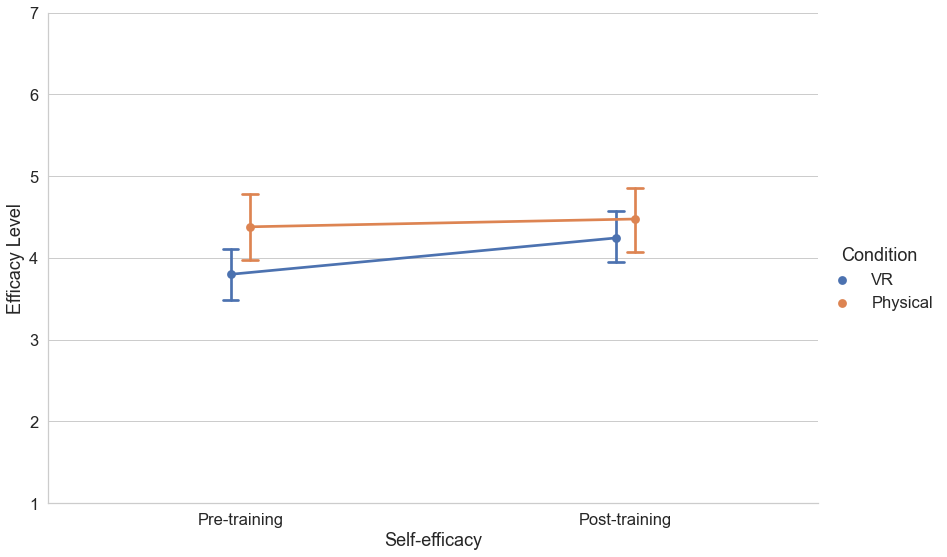

In [91]:
combined_eff_df = combined_results_df[['Self_Efficacy_1', 'Self_Efficacy_2', 'Condition']].copy()
combined_eff_df.rename(columns={'Self_Efficacy_1': 'Pre-training', 'Self_Efficacy_2': 'Post-training'}, inplace=True)
combined_eff_df_long = combined_eff_df.melt(id_vars=['Condition'], var_name='Self-efficacy', value_name='Efficacy Level')

sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
ax = sns.catplot(x='Self-efficacy', y='Efficacy Level', dodge = True, hue= 'Condition', kind="point", data=combined_eff_df_long, size=8, aspect=1.5, capsize=.04)
ax.set(ylim=(1.0, 7.0))




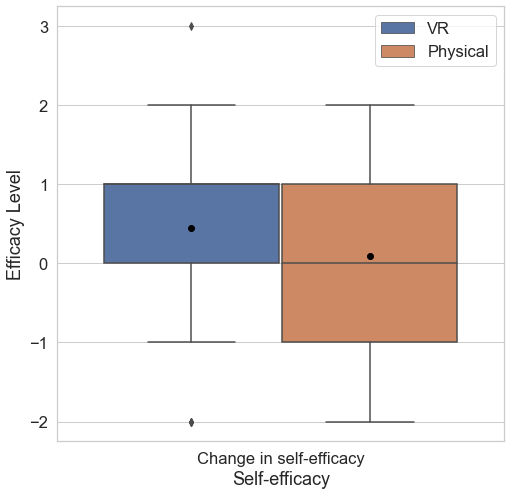

In [234]:
combined_eff_diff_df = combined_results_df[['Eff_Diff', 'Condition']].copy()
combined_eff_diff_df.rename(columns={'Eff_Diff': 'Change in self-efficacy'}, inplace=True)
combined_eff_diff_df_long = combined_eff_diff_df.melt(id_vars=['Condition'], var_name='Self-efficacy', value_name='Efficacy Level')
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
p = sns.boxplot(x="Self-efficacy", y="Efficacy Level", hue="Condition", data=combined_eff_diff_df_long, showmeans=True, meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
plt.legend(loc='upper right', title='')

In [ ]:
combined_results_hilo_gsr_df = combined_results_high_low_df[['Performance Category', 'Pretest_GSR_Corrected' , 'Mean GSR (Training)', 'Posttest_GSR_Corrected']].copy()
combined_results_hilo_gsr_df.rename(columns={'Pretest_GSR_Corrected': 'Pretest', 'Posttest_GSR_Corrected' : 'Posttest', 'Mean GSR (Training)' : 'Training'}, inplace=True)
#melt combined_results_hilo_gsr_df
combined_results_hilo_gsr_long_df = pd.melt(combined_results_hilo_gsr_df, id_vars=['Performance Category'], var_name= 'Level', value_name='SCL')
combined_results_hilo_gsr_long_df.head()
#print(combined_results_hilo_gsr_melt_df)
sns.set_palette("Paired", 2)
p = sns.boxplot(x="Level", y="SCL", hue="Performance Category", data=combined_results_hilo_gsr_long_df, showmeans=True, meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
plt.legend(loc='upper left', title='')

# __NASA-TLX__
---

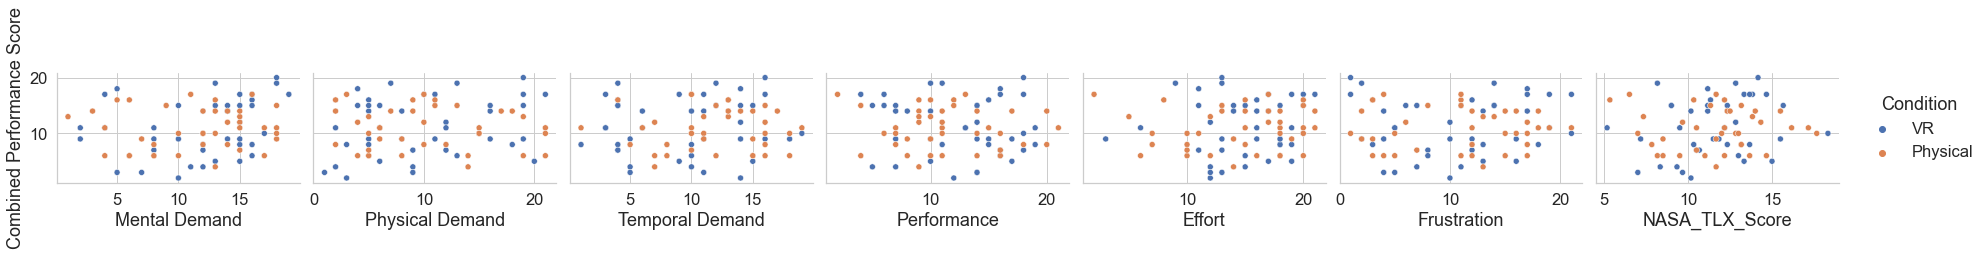

In [46]:
sns.pairplot(
    combined_results_df,
    x_vars=['Mental Demand','Physical Demand','Temporal Demand','Performance','Effort','Frustration','NASA_TLX_Score'],
    y_vars=['Combined Performance Score'],
    aspect=1.5,
    hue='Condition'
) 

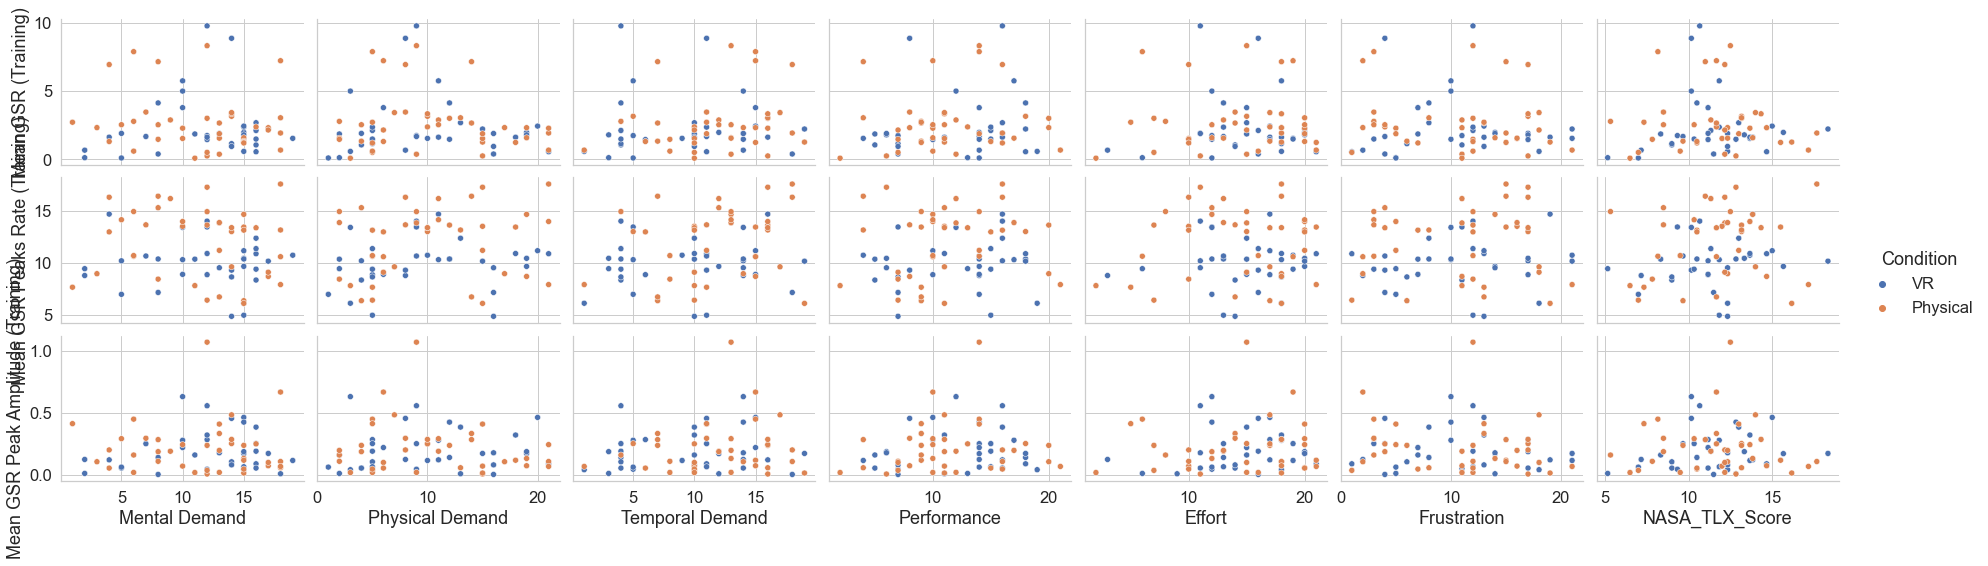

In [47]:
sns.pairplot(
    combined_results_df,
    x_vars=['Mental Demand','Physical Demand','Temporal Demand','Performance','Effort','Frustration','NASA_TLX_Score'],
    y_vars=["Mean GSR (Training)", "Mean GSR Peaks Rate (Training)", "Mean GSR Peak Amplitude (Training)"],
    aspect=1.5,
    hue='Condition'
)


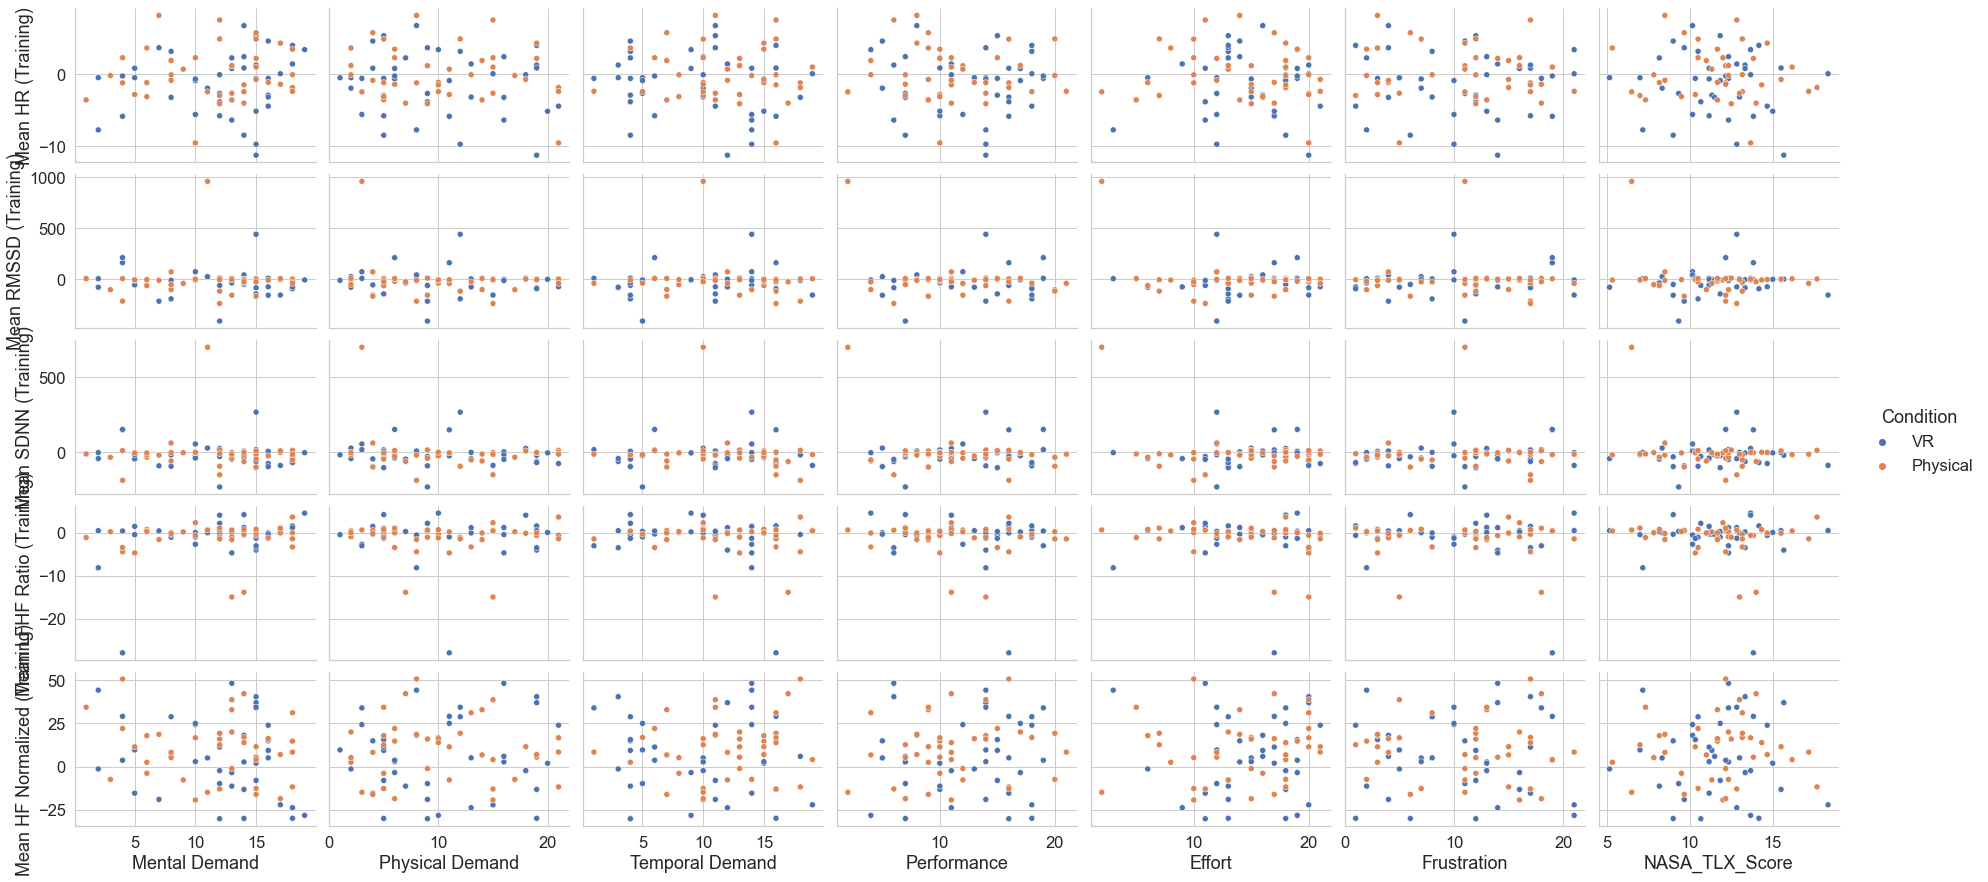

In [48]:
sns.pairplot(
    combined_results_df,
    x_vars=['Mental Demand','Physical Demand','Temporal Demand','Performance','Effort','Frustration','NASA_TLX_Score'],
    y_vars=['Mean HR (Training)', "Mean RMSSD (Training)", "Mean SDNN (Training)", "Mean LFHF Ratio (Training)", "Mean HF Normalized (Training)"],
    aspect=1.5,
    hue='Condition'
)


In [110]:
#Mental Demand
print("\nMean of Mental Demand in physical and VR")
print(round(ph_results_df['Mental Demand'].mean(skipna=True),2), round(vr_results_df['Mental Demand'].mean(skipna=True),2))
print("Mann Whitney U test for Mental Demand in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Mental Demand'], y=vr_results_df['Mental Demand'], alternative = 'less'))

#Physical Demand
print("\nMean of Physical Demand in physical and VR")
print(round(ph_results_df['Physical Demand'].mean(skipna=True),2), round(vr_results_df['Physical Demand'].mean(skipna=True),2))
print("Mann Whitney U test for Physical Demand in VR vs physical")
print(stats.mannwhitneyu(x=ph_results_df['Physical Demand'], y=vr_results_df['Physical Demand'], alternative = 'less'))

#Temporal Demand
print("\nMean of Temporal Demand in physical and VR")
print(round(ph_results_df['Temporal Demand'].mean(skipna=True),2), round(vr_results_df['Temporal Demand'].mean(skipna=True),2))
print(round(ph_results_df['Temporal Demand'].median(skipna=True),2), round(vr_results_df['Temporal Demand'].median(skipna=True),2))
print("Mann Whitney U test for Temporal Demand in VR vs physical")
print(stats.mannwhitneyu(x=ph_results_df['Temporal Demand'], y=vr_results_df['Temporal Demand'], alternative = 'greater'))

#Performance
print("\nMean of Performance in physical and VR")
print(round(ph_results_df['Performance'].mean(skipna=True),2), round(vr_results_df['Performance'].mean(skipna=True),2))
print("Mann Whitney U test for Performance in VR vs physical")
print(stats.mannwhitneyu(x=ph_results_df['Performance'], y=vr_results_df['Performance'], alternative = 'less'))

#Effort
print("\nMean of Effort in physical and VR")
print(round(ph_results_df['Effort'].mean(skipna=True),2), round(vr_results_df['Effort'].mean(skipna=True),2))
print("Mann Whitney U test for Effort in VR vs physical")
print(stats.mannwhitneyu(x=ph_results_df['Effort'], y=vr_results_df['Effort'], alternative = 'greater'))

#Frustration
print("\nMean of Frustration in physical and VR")
print(round(ph_results_df['Frustration'].mean(skipna=True),2), round(vr_results_df['Frustration'].mean(skipna=True),2))
print("Mann Whitney U test for Frustration in VR vs physical")
print(stats.mannwhitneyu(x=ph_results_df['Frustration'], y=vr_results_df['Frustration'], alternative = 'less'))

#NASA TLX Score
print("\nMean of NASA TLX Score in physical and VR")
print(round(ph_results_df['NASA_TLX_Score'].mean(skipna=True),2), round(vr_results_df['NASA_TLX_Score'].mean(skipna=True),2))
print(round(ph_results_df['NASA_TLX_Score'].median(skipna=True),2), round(vr_results_df['NASA_TLX_Score'].median(skipna=True),2))
print(round(ph_results_df['NASA_TLX_Score'].std(skipna=True),2), round(vr_results_df['NASA_TLX_Score'].std(skipna=True),2))
#t-test
print("\nLevene's test for equal variance for NASA TLX Score in physical condition and VR condition")
print(stats.levene(ph_results_df['NASA_TLX_Score'],vr_results_df['NASA_TLX_Score']))
print("\nT-test for NASA TLX Score in physical vs VR")
print(pg.ttest(ph_results_df['NASA_TLX_Score'], vr_results_df['NASA_TLX_Score'], paired=False, correction=True, alternative='greater'))
#print(stats.ttest_ind(a=ph_results_df['NASA_TLX_Score'], b=vr_results_df['NASA_TLX_Score'], equal_var=True, alternative='greater'))
print("Mann Whitney U test for NASA TLX Score in VR vs physical")
print(stats.mannwhitneyu(x=ph_results_df['NASA_TLX_Score'], y=vr_results_df['NASA_TLX_Score'], alternative = 'greater'))

print("Cronbach's alpha for NASA TLX in physical and VR")
combined_nasatlx_df = combined_results_df[['Mental Demand','Physical Demand','Temporal Demand','Performance','Effort','Frustration']]
pg.cronbach_alpha(combined_nasatlx_df)



Mean of Mental Demand in physical and VR
11.52 12.07
Mann Whitney U test for Mental Demand in physical vs VR
MannwhitneyuResult(statistic=874.0, pvalue=0.27381982532507554)

Mean of Physical Demand in physical and VR
9.95 10.22
Mann Whitney U test for Physical Demand in VR vs physical
MannwhitneyuResult(statistic=915.0, pvalue=0.40087685862164857)

Mean of Temporal Demand in physical and VR
11.71 9.16
12.0 10.0
Mann Whitney U test for Temporal Demand in VR vs physical
MannwhitneyuResult(statistic=1240.0, pvalue=0.006060274057459368)

Mean of Performance in physical and VR
11.38 12.4
Mann Whitney U test for Performance in VR vs physical
MannwhitneyuResult(statistic=802.0, pvalue=0.11235971098158498)

Mean of Effort in physical and VR
14.52 14.49
Mann Whitney U test for Effort in VR vs physical
MannwhitneyuResult(statistic=973.0, pvalue=0.4073354317964605)

Mean of Frustration in physical and VR
10.62 10.82
Mann Whitney U test for Frustration in VR vs physical
MannwhitneyuResult(statist

(0.49802748926755935, array([0.315, 0.645]))

In [49]:
#Number of participants
print(vr_results_df['Mental Demand'].notna().sum())
print(ph_results_df['Mental Demand'].notna().sum())

45
42


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


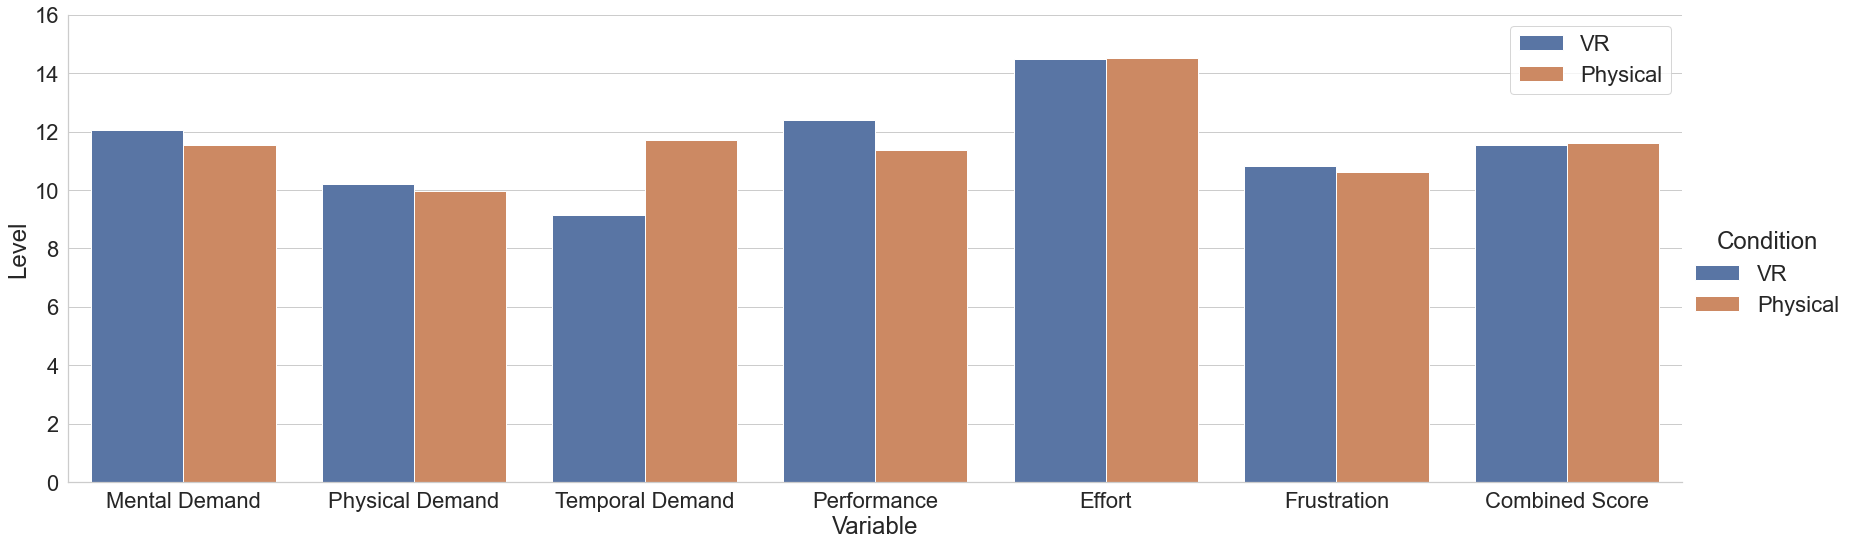

In [229]:
nasatlx_df = combined_results_df[['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration', 'NASA_TLX_Score', 'Condition']].copy()
nasatlx_df.rename(columns={'NASA_TLX_Score': 'Combined Score'}, inplace=True)
nasatlx_df_long = nasatlx_df.melt(id_vars=['Condition'], var_name='Variable', value_name='Level')

sns.set(rc={'figure.figsize':(80,8)}, font_scale=2, style='whitegrid')
#sns.catplot(x='Self-efficacy', y='Efficacy Level', dodge = True, hue= 'Condition', kind="point", data=nasatlx_df_long, capsize=.04)

ax = sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=nasatlx_df_long, ci = None, size=8, aspect=3, capsize=.04)
ax.set(ylim=(0.0, 16.0))
plt.legend(loc='upper right', title='')

In [51]:
print(stats.spearmanr(combined_results_df['NASA_TLX_Score'], combined_results_df['Mean RMSSD (Training)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['NASA_TLX_Score'], combined_results_df['Mean HF Normalized (Training)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['NASA_TLX_Score'], combined_results_df['Mean LFHF Ratio (Training)'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['NASA_TLX_Score'], combined_results_df['Mean GSR Peaks Rate (Training)'], nan_policy='omit'))


#print(stats.kendalltau(combined_results_df['Enjoyment'], combined_results_df['NASA_TLX_Score'], nan_policy='omit'))

SpearmanrResult(correlation=0.04572079618348735, pvalue=0.6910107313613776)
SpearmanrResult(correlation=0.04861788039101878, pvalue=0.6725147365053916)
SpearmanrResult(correlation=-0.055791010284775656, pvalue=0.6275658341585861)
SpearmanrResult(correlation=0.18462876663517863, pvalue=0.12052126904885634)


# __Enjoyment__
---

In [115]:
print("\nMean of Enjoyment in physical and VR")
print(round(ph_results_df['Enjoyment'].mean(skipna=True),2), round(vr_results_df['Enjoyment'].mean(skipna=True),2))
print(round(ph_results_df['Enjoyment'].median(skipna=True),2), round(vr_results_df['Enjoyment'].median(skipna=True),2))
print(round(ph_results_df['Enjoyment'].std(skipna=True),2), round(vr_results_df['Enjoyment'].std(skipna=True),2))
print("Mann Whitney U test for Enjoyment in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Enjoyment'], y=vr_results_df['Enjoyment'], alternative = 'less'))


Mean of Enjoyment in physical and VR
5.52 6.02
6.0 6.0
1.15 1.23
Mann Whitney U test for Enjoyment in physical vs VR
MannwhitneyuResult(statistic=662.5, pvalue=0.005437604466250023)


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


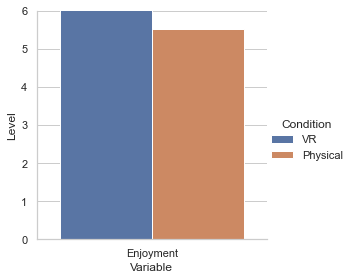

In [224]:
enjoyment_score_df = combined_results_df[['Enjoyment', 'Condition']].copy()
#nasatlx_df.rename(columns={'NASA_TLX_Score': 'Combined Score'}, inplace=True)
enjoyment_score_df_long = enjoyment_score_df.melt(id_vars=['Condition'], var_name='Variable', value_name='Level')

sns.set(rc={'figure.figsize':(8,8)}, font_scale=1, style='whitegrid')
ax = sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=enjoyment_score_df_long, ci = None, size=4, aspect=1, capsize=.04)
ax.set(ylim=(0.0, 6.0))

In [95]:
print(stats.spearmanr(combined_results_df['Enjoyment'], combined_results_df['NASA_TLX_Score'], nan_policy='omit'))
#print(stats.kendalltau(combined_results_df['Enjoyment'], combined_results_df['NASA_TLX_Score'], nan_policy='omit'))

SpearmanrResult(correlation=0.16546727939605788, pvalue=0.12561328333672336)


# __Immersion__
---

Immersion1	Makes me feel immersed

*Immersion2	Gives me the feeling that time passes quickly

Immersion3	Grabs all of my attention

*Immersion4	Gives me a sense of being separated from the real world

Immersion5	Makes me lose myself in what I am doing

Immersion6	Makes my actions seem to come automatically

*Immersion7	Causes me to stop noticing when I get tired

Immersion8	Causes me to forget about my everyday concerns

*Immersion9	Makes me ignore everything around me

Immersion10	Gets me fully emotionally involved

Immersion11	Captivates me


In [104]:
print("\nMean of Immersion1 in physical and VR")
print(round(ph_results_df['Immersion1'].mean(skipna=True),2), round(vr_results_df['Immersion1'].mean(skipna=True),2))
print(round(ph_results_df['Immersion1'].std(skipna=True),2), round(vr_results_df['Immersion1'].std(skipna=True),2))
print("Mann Whitney U test for Immersion1 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Immersion1'], y=vr_results_df['Immersion1'], alternative = 'less'))

print("\nMean of Immersion2 in physical and VR")
print(round(ph_results_df['Immersion2'].mean(skipna=True),2), round(vr_results_df['Immersion2'].mean(skipna=True),2))
print(round(ph_results_df['Immersion2'].std(skipna=True),2), round(vr_results_df['Immersion2'].std(skipna=True),2))
print("Mann Whitney U test for Immersion2 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Immersion2'], y=vr_results_df['Immersion2'], alternative = 'less'))

print("\nMean of Immersion3 in physical and VR")
print(round(ph_results_df['Immersion3'].mean(skipna=True),2), round(vr_results_df['Immersion3'].mean(skipna=True),2))
print(round(ph_results_df['Immersion3'].std(skipna=True),2), round(vr_results_df['Immersion3'].std(skipna=True),2))
print("Mann Whitney U test for Immersion3 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Immersion3'], y=vr_results_df['Immersion3'], alternative = 'less'))

print("\nMean of Immersion4 in physical and VR")
print(round(ph_results_df['Immersion4'].mean(skipna=True),2), round(vr_results_df['Immersion4'].mean(skipna=True),2))
print(round(ph_results_df['Immersion4'].std(skipna=True),2), round(vr_results_df['Immersion4'].std(skipna=True),2))
print("Mann Whitney U test for Immersion4 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Immersion4'], y=vr_results_df['Immersion4'], alternative = 'less'))

print("\nMean of Immersion5 in physical and VR")
print(round(ph_results_df['Immersion5'].mean(skipna=True),2), round(vr_results_df['Immersion5'].mean(skipna=True),2))
print(round(ph_results_df['Immersion5'].std(skipna=True),2), round(vr_results_df['Immersion5'].std(skipna=True),2))
print("Mann Whitney U test for Immersion5 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Immersion5'], y=vr_results_df['Immersion5'], alternative = 'less'))

print("\nMean of Immersion6 in physical and VR")
print(round(ph_results_df['Immersion6'].mean(skipna=True),2), round(vr_results_df['Immersion6'].mean(skipna=True),2))
print(round(ph_results_df['Immersion6'].std(skipna=True),2), round(vr_results_df['Immersion6'].std(skipna=True),2))
print("Mann Whitney U test for Immersion6 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Immersion6'], y=vr_results_df['Immersion6'], alternative = 'less'))

print("\nMean of Immersion7 in physical and VR")
print(round(ph_results_df['Immersion7'].mean(skipna=True),2), round(vr_results_df['Immersion7'].mean(skipna=True),2))
print(round(ph_results_df['Immersion7'].std(skipna=True),2), round(vr_results_df['Immersion7'].std(skipna=True),2))
print("Mann Whitney U test for Immersion7 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Immersion7'], y=vr_results_df['Immersion7'], alternative = 'less'))

print("\nMean of Immersion8 in physical and VR")
print(round(ph_results_df['Immersion8'].mean(skipna=True),2), round(vr_results_df['Immersion8'].mean(skipna=True),2))
print(round(ph_results_df['Immersion8'].std(skipna=True),2), round(vr_results_df['Immersion8'].std(skipna=True),2))
print("Mann Whitney U test for Immersion8 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Immersion8'], y=vr_results_df['Immersion8'], alternative = 'less'))

print("\nMean of Immersion9 in physical and VR")
print(round(ph_results_df['Immersion9'].mean(skipna=True),2), round(vr_results_df['Immersion9'].mean(skipna=True),2))
print(round(ph_results_df['Immersion9'].std(skipna=True),2), round(vr_results_df['Immersion9'].std(skipna=True),2))
print("Mann Whitney U test for Immersion9 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Immersion9'], y=vr_results_df['Immersion9'], alternative = 'less'))

print("\nMean of Immersion10 in physical and VR")
print(round(ph_results_df['Immersion10'].mean(skipna=True),2), round(vr_results_df['Immersion10'].mean(skipna=True),2))
print(round(ph_results_df['Immersion10'].std(skipna=True),2), round(vr_results_df['Immersion10'].std(skipna=True),2))
print("Mann Whitney U test for Immersion10 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Immersion10'], y=vr_results_df['Immersion10'], alternative = 'less'))

print("\nMean of Immersion11 in physical and VR")
print(round(ph_results_df['Immersion11'].mean(skipna=True),2), round(vr_results_df['Immersion11'].mean(skipna=True),2))
print(round(ph_results_df['Immersion11'].std(skipna=True),2), round(vr_results_df['Immersion11'].std(skipna=True),2))
print("Mann Whitney U test for Immersion11 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Immersion11'], y=vr_results_df['Immersion11'], alternative = 'less'))

print("\nMean of Immersion12 in physical and VR")
print(round(ph_results_df['Immersion12'].mean(skipna=True),2), round(vr_results_df['Immersion12'].mean(skipna=True),2))
print(round(ph_results_df['Immersion12'].std(skipna=True),2), round(vr_results_df['Immersion12'].std(skipna=True),2))


print("\nMean of Immersion Combined Score in physical and VR")
print(round(ph_results_df['Immersion_Score'].mean(skipna=True),2), round(vr_results_df['Immersion_Score'].mean(skipna=True),2))
print(round(ph_results_df['Immersion_Score'].std(skipna=True),2), round(vr_results_df['Immersion_Score'].std(skipna=True),2))
print("Mann Whitney U test for Immersion11 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Immersion_Score'], y=vr_results_df['Immersion_Score'], alternative = 'less'))

#t-test
print("\nLevene's test for equal variance for Immersion Score in physical condition and VR condition")
print(stats.levene(ph_results_df['Immersion_Score'],vr_results_df['Immersion_Score']))
print("\nT-test for Immersion Score Score in physical vs VR")
print(pg.ttest(ph_results_df['Immersion_Score'], vr_results_df['Immersion_Score'], paired=False, correction=True, alternative='less'))

print("Cronbach's alpha for Immersion in physical and VR")
combined_immersion_df = combined_results_df[['Immersion1','Immersion2','Immersion3','Immersion4','Immersion5','Immersion6','Immersion7','Immersion8','Immersion9','Immersion10','Immersion11']]
pg.cronbach_alpha(combined_immersion_df)



Mean of Immersion1 in physical and VR
4.9 5.02
1.39 1.37
Mann Whitney U test for Immersion1 in physical vs VR
MannwhitneyuResult(statistic=881.0, pvalue=0.289974820944766)

Mean of Immersion2 in physical and VR
4.95 5.36
1.34 1.28
Mann Whitney U test for Immersion2 in physical vs VR
MannwhitneyuResult(statistic=750.5, pvalue=0.04394756519468497)

Mean of Immersion3 in physical and VR
5.6 5.64
1.19 1.26
Mann Whitney U test for Immersion3 in physical vs VR
MannwhitneyuResult(statistic=899.0, pvalue=0.3436705831538115)

Mean of Immersion4 in physical and VR
3.64 4.78
1.64 1.51
Mann Whitney U test for Immersion4 in physical vs VR
MannwhitneyuResult(statistic=573.5, pvalue=0.0006891623836342906)

Mean of Immersion5 in physical and VR
4.48 4.64
1.78 1.61
Mann Whitney U test for Immersion5 in physical vs VR
MannwhitneyuResult(statistic=901.0, pvalue=0.3528850698784539)

Mean of Immersion6 in physical and VR
3.88 4.33
1.71 1.46
Mann Whitney U test for Immersion6 in physical vs VR
Mannwhitneyu

(0.8763442717711233, array([0.834, 0.912]))

C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


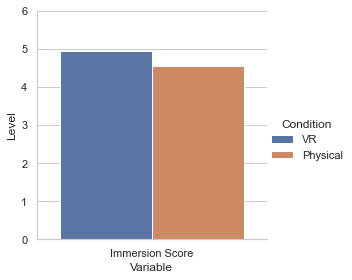

In [225]:
immersion_score_df = combined_results_df[['Immersion_Score', 'Condition']].copy()
immersion_score_df.rename(columns={'Immersion_Score': 'Immersion Score'}, inplace=True)
immersion_score_df_long = immersion_score_df.melt(id_vars=['Condition'], var_name='Variable', value_name='Level')

sns.set(rc={'figure.figsize':(8,8)}, font_scale=1, style='whitegrid')
ax = sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=immersion_score_df_long, ci = None, size=4, aspect=1, capsize=.04)
ax.set(ylim=(0.0, 6.0))

In [ ]:
#Write a program to generate fibonacci sequence till 1000
def fibonacci(n):
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a+b
fibonacci(1000)


# __Presence__
---

Presence1	During the training session, I forgot that I was in a lab.

Presence2	The training session totally filled my mind.

Presence3	During the training session, I was very captivated by what was presented to me.

Presence4	I felt like I really was present (“was there”) during the training.

*Presence5	When the training session was over, I felt like I was back from a journey.

*Presence6	During the training session, I was not conscious of the room setup (assistant, speaker, chairs…).

Presence7	During the training session, I lost the notion of time.

Presence8	During the training session, I was living what I was seeing as it was happening to me for real.

Presence9	I lived the experience  of performing the training intensely.

+Presence10	During the training session, I often thought of something else. 

Presence11	I felt more like a participant than spectator of the training.

+Presence12	I had to force myself to stay concentrated on the training session

Presence13	I always had in mind the fact that I was in a lab. 

+Presence14	I was reacting to everything I was seeing as if it was real.


In [113]:
print("\nMean of Presence1 in physical and VR")
print(round(ph_results_df['Presence1'].mean(skipna=True),2), round(vr_results_df['Presence1'].mean(skipna=True),2))
print(round(ph_results_df['Presence1'].std(skipna=True),2), round(vr_results_df['Presence1'].std(skipna=True),2))
print("Mann Whitney U test for Presence1 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Presence1'], y=vr_results_df['Presence1'], alternative = 'less'))

print("\nMean of Presence2 in physical and VR")
print(round(ph_results_df['Presence2'].mean(skipna=True),2), round(vr_results_df['Presence2'].mean(skipna=True),2))
print(round(ph_results_df['Presence2'].std(skipna=True),2), round(vr_results_df['Presence2'].std(skipna=True),2))
print("Mann Whitney U test for Presence2 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Presence2'], y=vr_results_df['Presence2'], alternative = 'less'))

print("\nMean of Presence3 in physical and VR")
print(round(ph_results_df['Presence3'].mean(skipna=True),2), round(vr_results_df['Presence3'].mean(skipna=True),2))
print(round(ph_results_df['Presence3'].std(skipna=True),2), round(vr_results_df['Presence3'].std(skipna=True),2))
print("Mann Whitney U test for Presence3 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Presence3'], y=vr_results_df['Presence3'], alternative = 'less'))

print("\nMean of Presence4 in physical and VR")
print(round(ph_results_df['Presence4'].mean(skipna=True),2), round(vr_results_df['Presence4'].mean(skipna=True),2))
print(round(ph_results_df['Presence4'].std(skipna=True),2), round(vr_results_df['Presence4'].std(skipna=True),2))
print("Mann Whitney U test for Presence4 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Presence4'], y=vr_results_df['Presence4'], alternative = 'greater'))

print("\nMean of Presence5 in physical and VR")
print(round(ph_results_df['Presence5'].mean(skipna=True),2), round(vr_results_df['Presence5'].mean(skipna=True),2))
print(round(ph_results_df['Presence5'].std(skipna=True),2), round(vr_results_df['Presence5'].std(skipna=True),2))
print("Mann Whitney U test for Presence5 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Presence5'], y=vr_results_df['Presence5'], alternative = 'less'))

print("\nMean of Presence6 in physical and VR")
print(round(ph_results_df['Presence6'].mean(skipna=True),2), round(vr_results_df['Presence6'].mean(skipna=True),2))
print(round(ph_results_df['Presence6'].std(skipna=True),2), round(vr_results_df['Presence6'].std(skipna=True),2))
print("Mann Whitney U test for Presence6 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Presence6'], y=vr_results_df['Presence6'], alternative = 'less'))

print("\nMean of Presence7 in physical and VR")
print(round(ph_results_df['Presence7'].mean(skipna=True),2), round(vr_results_df['Presence7'].mean(skipna=True),2))
print(round(ph_results_df['Presence7'].std(skipna=True),2), round(vr_results_df['Presence7'].std(skipna=True),2))
print("Mann Whitney U test for Presence7 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Presence7'], y=vr_results_df['Presence7'], alternative = 'less'))

print("\nMean of Presence8 in physical and VR")
print(round(ph_results_df['Presence8'].mean(skipna=True),2), round(vr_results_df['Presence8'].mean(skipna=True),2))
print(round(ph_results_df['Presence8'].std(skipna=True),2), round(vr_results_df['Presence8'].std(skipna=True),2))
print("Mann Whitney U test for Presence8 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Presence8'], y=vr_results_df['Presence8'], alternative = 'greater'))

print("\nMean of Presence9 in physical and VR")
print(round(ph_results_df['Presence9'].mean(skipna=True),2), round(vr_results_df['Presence9'].mean(skipna=True),2))
print(round(ph_results_df['Presence9'].std(skipna=True),2), round(vr_results_df['Presence9'].std(skipna=True),2))
print("Mann Whitney U test for Presence9 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Presence9'], y=vr_results_df['Presence9'], alternative = 'less'))

print("\nMean of Presence10 in physical and VR")
print(round((7-ph_results_df['Presence10']).mean(skipna=True),2), round((7-vr_results_df['Presence10']).mean(skipna=True),2))
print(round((7-ph_results_df['Presence10']).std(skipna=True),2), round((7-vr_results_df['Presence10']).std(skipna=True),2))
print("Mann Whitney U test for Presence10 in physical vs VR")
print(stats.mannwhitneyu(x=(7-ph_results_df['Presence10']), y=(7-vr_results_df['Presence10']), alternative = 'less'))

print("\nMean of Presence11 in physical and VR")
print(round(ph_results_df['Presence11'].mean(skipna=True),2), round(vr_results_df['Presence11'].mean(skipna=True),2))
print(round(ph_results_df['Presence11'].std(skipna=True),2), round(vr_results_df['Presence11'].std(skipna=True),2))
print("Mann Whitney U test for Presence11 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Presence11'], y=vr_results_df['Presence11'], alternative = 'greater'))

print("\nMean of Presence12 in physical and VR")
print(round((7-ph_results_df['Presence12']).mean(skipna=True),2), round((7-vr_results_df['Presence12']).mean(skipna=True),2))
print(round((7-ph_results_df['Presence12']).std(skipna=True),2), round((7-vr_results_df['Presence12']).std(skipna=True),2))
print("Mann Whitney U test for Presence12 in physical vs VR")
print(stats.mannwhitneyu(x=(7-ph_results_df['Presence12']), y=(7-vr_results_df['Presence12']), alternative = 'less'))

print("\nMean of Presence13 in physical and VR")
print(round((7-ph_results_df['Presence13']).mean(skipna=True),2), round((7-vr_results_df['Presence13']).mean(skipna=True),2))
print(round((7-ph_results_df['Presence13']).std(skipna=True),2), round((7-vr_results_df['Presence13']).std(skipna=True),2))
print("Mann Whitney U test for Presence13 in physical vs VR")
print(stats.mannwhitneyu(x=(7-ph_results_df['Presence13']), y=(7-vr_results_df['Presence13']), alternative = 'less'))

print("\nMean of Presence14 in physical and VR")
print(round(ph_results_df['Presence14'].mean(skipna=True),2), round(vr_results_df['Presence14'].mean(skipna=True),2))
print(round(ph_results_df['Presence14'].std(skipna=True),2), round(vr_results_df['Presence14'].std(skipna=True),2))
print("Mann Whitney U test for Presence14 in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Presence14'], y=vr_results_df['Presence14'], alternative = 'greater'))

print("\nMean of Presence Combined Score in physical and VR")
print(round(ph_results_df['Presence_Score'].mean(skipna=True),2), round(vr_results_df['Presence_Score'].mean(skipna=True),2))
print(round(ph_results_df['Presence_Score'].median(skipna=True),2), round(vr_results_df['Presence_Score'].median(skipna=True),2))
print(round(ph_results_df['Presence_Score'].std(skipna=True),2), round(vr_results_df['Presence_Score'].std(skipna=True),2))
print("Mann Whitney U test for Presence Combined Score in physical vs VR")
print(stats.mannwhitneyu(x=ph_results_df['Presence_Score'], y=vr_results_df['Presence_Score'], alternative = 'less'))

print("Cronbach's alpha for Presence in physical and VR")
combined_presence_df = combined_results_df[['Presence1','Presence2','Presence3','Presence4','Presence5','Presence6','Presence7','Presence8','Presence9','Presence10','Presence11','Presence12','Presence13','Presence14']]
pg.cronbach_alpha(combined_presence_df)


Mean of Presence1 in physical and VR
3.19 3.76
1.77 1.63
Mann Whitney U test for Presence1 in physical vs VR
MannwhitneyuResult(statistic=768.0, pvalue=0.06234800560689028)

Mean of Presence2 in physical and VR
4.88 5.16
1.53 1.22
Mann Whitney U test for Presence2 in physical vs VR
MannwhitneyuResult(statistic=850.5, pvalue=0.2040676651780855)

Mean of Presence3 in physical and VR
5.31 5.58
1.2 1.27
Mann Whitney U test for Presence3 in physical vs VR
MannwhitneyuResult(statistic=810.5, pvalue=0.11792244562332754)

Mean of Presence4 in physical and VR
5.43 5.04
1.04 1.45
Mann Whitney U test for Presence4 in physical vs VR
MannwhitneyuResult(statistic=1040.5, pvalue=0.20068352654614258)

Mean of Presence5 in physical and VR
3.45 4.07
1.64 1.54
Mann Whitney U test for Presence5 in physical vs VR
MannwhitneyuResult(statistic=736.0, pvalue=0.03598689214884324)

Mean of Presence6 in physical and VR
3.12 4.27
1.6 1.9
Mann Whitney U test for Presence6 in physical vs VR
MannwhitneyuResult(stat

(0.6859703940971074, array([0.58 , 0.775]))

C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


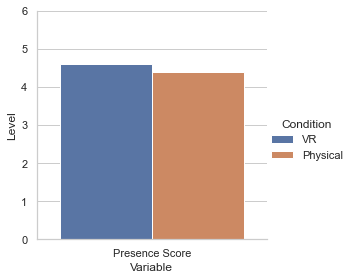

In [226]:
presence_score_df = combined_results_df[['Presence_Score', 'Condition']].copy()
presence_score_df.rename(columns={'Presence_Score': 'Presence Score'}, inplace=True)
presence_score_df_long = presence_score_df.melt(id_vars=['Condition'], var_name='Variable', value_name='Level')

sns.set(rc={'figure.figsize':(8,8)}, font_scale=1, style='whitegrid')
ax = sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=presence_score_df_long, ci = None, size=4, aspect=1, capsize=.04)
ax.set(ylim=(0.0, 6.0))

In [25]:
'''
ph_eff_df = pd.read_csv('..\\OnlineSurvey\\Self_Eff_Ph.csv')
ph_eff_df
print("Wilcoxon test for pre and post-training self-efficacy in Physical condition")
print(stats.wilcoxon(ph_eff_df['Eff1'], ph_eff_df['Eff2']))
'''

'\nph_eff_df = pd.read_csv(\'..\\OnlineSurvey\\Self_Eff_Ph.csv\')\nph_eff_df\nprint("Wilcoxon test for pre and post-training self-efficacy in Physical condition")\nprint(stats.wilcoxon(ph_eff_df[\'Eff1\'], ph_eff_df[\'Eff2\']))\n'

In [24]:
#ph_eff_df['Eff2'].mean(skipna=True) - ph_eff_df['Eff1'].mean(skipna=True)

In [23]:
#Draw box plot of Baseline_HR and Baseline_GSR columns in ph_results_df
#ph_results_df.boxplot(column=['Baseline_GSR', 'Pretest_GSR' , 'Norm_Level_1_GSR', 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR', 'Norm_Posttest_GSR'], figsize=(14,10),showmeans=True)


In [ ]:
#ph_results_df.boxplot(column=['Baseline_HR', 'Pretest_HR' , 'Norm_Level_1_HR', 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR', 'Norm_Posttest_HR'], figsize=(14,10),showmeans=True)

In [ ]:
#ph_results_df.boxplot(column=['Pretest_Time', 'Level_1_Time', 'Level_2_Time', 'Level_3_Time', 'Level_4_Time', 'Posttest_Time'], figsize=(14,10),showmeans=True)

In [ ]:
#ph_results_df.boxplot(column=['Pretest_Mistake_Time', 'Level_1_Mistake_Time', 'Level_2_Mistake_Time', 'Level_3_Mistake_Time', 'Level_4_Mistake_Time', 'Posttest_Mistake_Time'], figsize=(14,10),showmeans=True)

In [48]:
#vr_results_df['Norm_Level_1_GSR'].hist(bins=20)

In [ ]:
#vr_results_df[vr_results_df["Norm_Level_1_GSR"].notna()]["Norm_Level_1_GSR"]

In [28]:
'''
vr_eff_df = pd.read_csv('..\\OnlineSurvey\\Self_Eff_VR.csv')
vr_eff_df
print("Wilcoxon test for pre and post-training self-efficacy in VR condition")
print(stats.wilcoxon(vr_eff_df['Eff1'], vr_eff_df['Eff2']))
'''

'\nvr_eff_df = pd.read_csv(\'..\\OnlineSurvey\\Self_Eff_VR.csv\')\nvr_eff_df\nprint("Wilcoxon test for pre and post-training self-efficacy in VR condition")\nprint(stats.wilcoxon(vr_eff_df[\'Eff1\'], vr_eff_df[\'Eff2\']))\n'

In [27]:
#vr_eff_df.describe()

In [ ]:
#vr_results_df.boxplot(column=['Baseline_GSR', 'Norm_Pretest_GSR' , 'Norm_Level_1_GSR', 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR', 'Norm_Posttest_GSR'], figsize=(14,10),showmeans=True)
#vr_results_df.boxplot(column=['Baseline_HR', 'Norm_Pretest_HR' , 'Norm_Level_1_HR', 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR', 'Norm_Posttest_HR'], figsize=(14,10),showmeans=True)
#vr_results_df.boxplot(column=['Pretest_Time', 'Level_1_Time', 'Level_2_Time', 'Level_3_Time', 'Level_4_Time', 'Posttest_Time'], figsize=(10,10),showmeans=True)
#vr_results_df.boxplot(column=['Pretest_Mistake_Time', 'Level_1_Mistake_Time', 'Level_2_Mistake_Time', 'Level_3_Mistake_Time', 'Level_4_Mistake_Time', 'Posttest_Mistake_Time'], figsize=(14,10),showmeans=True)

VR vs Physical

In [29]:
#print(stats.mannwhitneyu(x=ph_eff_df['Eff_diff'], y=vr_eff_df['Eff_diff'], alternative = 'less')) 

In [30]:
#vr_results_df['Mistake_Gain'].describe()

In [31]:
#combined_results_df['Test_Score'] = 1 / np.sqrt(combined_results_df['Time_Gain'] * combined_results_df['Mistake_Gain'])

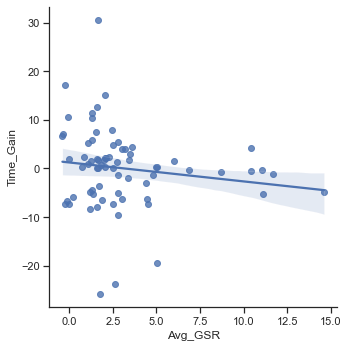

In [107]:
sns.lmplot(data=combined_results_df, x="Avg_GSR", y="Time_Gain")

In [ ]:
combined_results_df_high_HF = combined_results_df[combined_results_df['Mean HF Normalized (Training)'] > combined_results_df['Mean HF Normalized (Training)'].quantile(0.75)]
#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Mistake_Gain'], nan_policy='omit'))
#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=0.3560371517027864, pvalue=0.14702554764788864)
SpearmanrResult(correlation=-0.09803921568627451, pvalue=0.6987424830235279)


In [ ]:
combined_results_df_low_HR = combined_results_df[combined_results_df['Avg_HR'] < combined_results_df['Avg_HR'].quantile(0.25)]
print(stats.spearmanr(combined_results_df_low_HR['Avg_HR'], combined_results_df_low_HR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_low_HR['Avg_HR'], combined_results_df_low_HR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=0.12972972972972976, pvalue=0.4507871465252461)
SpearmanrResult(correlation=-0.05662805662805664, pvalue=0.7428808870113839)


In [ ]:
combined_results_df_mid_HR = combined_results_df[(combined_results_df['Avg_HR'] > combined_results_df['Avg_HR'].quantile(0.15)) & (combined_results_df['Avg_HR'] < combined_results_df['Avg_HR'].quantile(0.85))]
print(stats.spearmanr(combined_results_df_mid_HR['Avg_HR'], combined_results_df_mid_HR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_mid_HR['Avg_HR'], combined_results_df_mid_HR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=0.1479471788715486, pvalue=0.3052024577818458)
SpearmanrResult(correlation=0.015702280912364946, pvalue=0.913813102725811)


In [ ]:
combined_results_df_hilo_hr = pd.concat([combined_results_df_high_HR, combined_results_df_low_HR], axis=0)
print(stats.spearmanr(combined_results_df_hilo_hr['Avg_HR'], combined_results_df_hilo_hr['Mistake_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=0.19716859716859722, pvalue=0.24906668175139635)


In [ ]:
combined_results_df_high_GSR = combined_results_df[combined_results_df['Avg_GSR'] > combined_results_df['Avg_GSR'].quantile(0.75)]
print(stats.spearmanr(combined_results_df_high_GSR['Avg_GSR'], combined_results_df_high_GSR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_high_GSR['Avg_GSR'], combined_results_df_high_GSR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=-0.2507739938080495, pvalue=0.31551339595948574)
SpearmanrResult(correlation=-0.1496388028895769, pvalue=0.5534228921214378)


In [ ]:
combined_results_df_low_GSR = combined_results_df[combined_results_df['Avg_HR'] < combined_results_df['Avg_HR'].quantile(0.25)]
print(stats.spearmanr(combined_results_df_low_GSR['Avg_GSR'], combined_results_df_low_GSR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_low_GSR['Avg_GSR'], combined_results_df_low_GSR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=-0.11867905056759545, pvalue=0.6390493358496443)
SpearmanrResult(correlation=-0.31475748194014447, pvalue=0.20331354771785812)


In [ ]:
combined_results_df.describe()

C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Unnamed: 0,Baseline_HR,Baseline_GSR,Pretest_Time,Pretest_Mistake_Time,Pretest_GSR,Pretest_HR,Level_1_Time,Level_1_Mistake_Time,Level_1_HR,...,Norm_Level_3_HR,Norm_Level_3_GSR,Norm_Level_4_HR,Norm_Level_4_GSR,Norm_Posttest_HR,Norm_Posttest_GSR,Time_Gain,Mistake_Gain,Avg_GSR,Avg_HR
count,40.000000,39.000000,39.000000,40.000000,40.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,32.000000,41.000000,41.000000,33.000000,33.000000
mean,19.500000,74.907976,1.638849,21.983323,3.138121,3.105645,79.636630,8.740348,0.191531,74.889141,...,72.337447,2.775583,73.225575,2.913297,76.397509,3.562960,1.340136,1.212057,2.704427,73.214653
std,11.690452,12.295171,1.222840,12.002677,1.581298,2.539813,13.241658,3.952119,0.275587,12.719334,...,13.223825,3.102874,13.303283,3.073179,13.900464,3.437163,8.460420,2.029335,3.076615,13.765000
min,0.000000,49.836066,0.388673,8.458740,0.000000,0.252664,54.466667,4.038280,0.000000,51.000000,...,48.904762,-0.391428,43.925926,-0.362710,49.055556,-0.057359,-19.471416,-2.590388,-0.398094,45.700435
25%,9.750000,66.208619,0.821497,13.955063,2.149136,1.594634,68.371528,6.028757,0.000000,65.215909,...,63.424242,1.274730,66.337838,1.586777,67.900000,1.640301,-4.778246,-0.013862,1.264140,64.848853
50%,19.500000,76.407080,1.225052,18.793420,2.962966,2.151845,79.366667,7.407319,0.092889,76.000000,...,70.578947,2.018353,70.210526,2.102728,74.566667,2.604463,1.490965,1.053452,1.879275,70.539719
75%,29.250000,84.449404,2.214465,26.257368,3.940936,3.861507,88.063235,10.465781,0.281453,83.392857,...,76.903226,2.874541,78.636364,3.075578,82.097561,3.950630,5.845163,1.688275,2.795485,78.948851
max,39.000000,96.401384,5.098206,71.426308,8.981445,10.820270,106.718750,24.004306,1.291825,101.200000,...,111.548387,14.945498,110.391304,14.350258,113.581395,14.677046,29.535441,10.733681,14.613092,111.919660


In [ ]:
print(stats.mannwhitneyu(x=vr_results_df['Avg_GSR'].dropna(), y=ph_results_df['Avg_GSR'].dropna(), alternative = 'less'))
print(stats.mannwhitneyu(x=vr_results_df['Avg_HR'].dropna(), y=ph_results_df['Avg_HR'].dropna(), alternative = 'less'))

MannwhitneyuResult(statistic=542.0, pvalue=0.12683894842626298)
MannwhitneyuResult(statistic=596.0, pvalue=0.29764869379041836)


In [ ]:
#Levene's test for equal variances
'''
print(stats.levene(ph_results_df['Norm_Pretest_HR'], vr_results_df['Norm_Pretest_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_1_HR'], vr_results_df['Norm_Level_1_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_2_HR'], vr_results_df['Norm_Level_2_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_3_HR'], vr_results_df['Norm_Level_3_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_4_HR'], vr_results_df['Norm_Level_4_HR'], center='median'))

print(stats.levene(ph_results_df['Norm_Pretest_GSR'], vr_results_df['Norm_Pretest_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_1_GSR'], vr_results_df['Norm_Level_1_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_2_GSR'], vr_results_df['Norm_Level_2_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_3_GSR'], vr_results_df['Norm_Level_3_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_4_GSR'], vr_results_df['Norm_Level_4_GSR'], center='median'))
'''

LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)


In [75]:
vr_eff_df['Condition'] = 'VR'
ph_eff_df['Condition'] = 'Physical'
combined_eff_df = pd.concat([vr_eff_df, ph_eff_df])

In [77]:
combined_eff_df
#combined_eff_df = combined_results_df[['Pretest_Mistake_Time', 'Posttest_Mistake_Time', 'Condition']].copy()
combined_eff_df.rename(columns={'Eff1': 'Pre-training', 'Eff2': 'Post-training'}, inplace=True)
combined_eff_df_long = combined_eff_df.melt(id_vars=['Condition'], var_name='Self-efficacy', value_name='Efficacy Level')
combined_eff_df_long

,Condition,Self-efficacy,Efficacy Level
0,VR,Pre-training,5
1,VR,Pre-training,5
2,VR,Pre-training,5
3,VR,Pre-training,4
4,VR,Pre-training,4
...,...,...,...
169,Physical,Post-training,3
170,Physical,Post-training,6
171,Physical,Post-training,4
172,Physical,Post-training,4


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


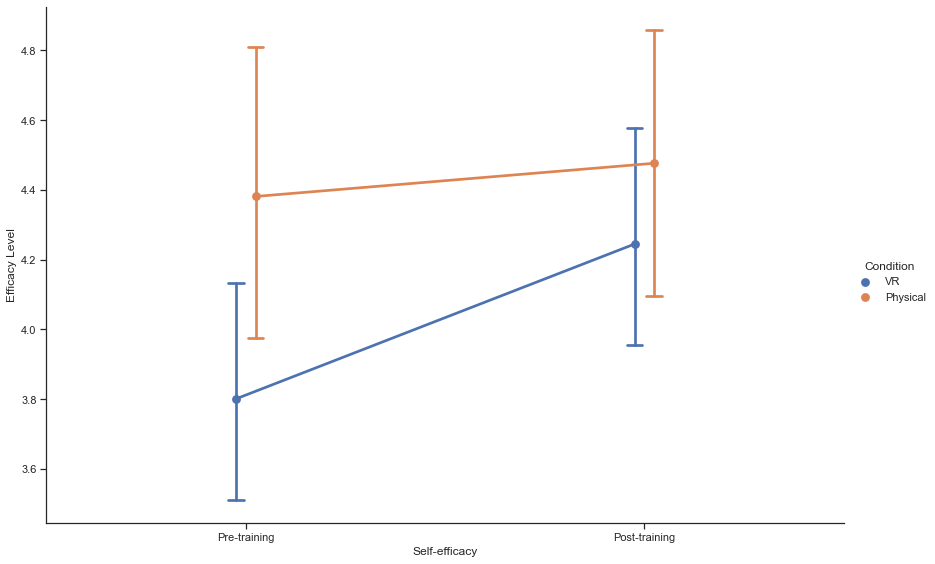

In [78]:
sns.catplot(x='Self-efficacy', y='Efficacy Level', dodge = True, hue= 'Condition', kind="point", data=combined_eff_df_long, size=8, aspect=1.5, capsize=.04)

In [35]:
vr_results_df['Condition'] = 'VR'
ph_results_df['Condition'] = 'Physical'

In [36]:
vr_results_df.columns

Index(['Unnamed: 0', 'Participant_ID', 'Baseline_HR', 'Baseline_GSR',
       'Pretest_Time', 'Pretest_Mistake_Time', 'Pretest_GSR', 'Pretest_HR',
       'Level_1_Time', 'Level_1_Mistake_Time', 'Level_1_HR', 'Level_1_GSR',
       'Level_2_Time', 'Level_2_Mistake_Time', 'Level_2_HR', 'Level_2_GSR',
       'Level_3_Time', 'Level_3_Mistake_Time', 'Level_3_HR', 'Level_3_GSR',
       'Level_4_Time', 'Level_4_Mistake_Time', 'Level_4_HR', 'Level_4_GSR',
       'Posttest_Time', 'Posttest_Mistake_Time', 'Posttest_GSR', 'Posttest_HR',
       'Condition', 'Time_Gain', 'Mistake_Gain', 'Norm_Pretest_HR',
       'Norm_Pretest_GSR', 'Norm_Level_1_HR', 'Norm_Level_1_GSR',
       'Norm_Level_2_HR', 'Norm_Level_2_GSR', 'Norm_Level_3_HR',
       'Norm_Level_3_GSR', 'Norm_Level_4_HR', 'Norm_Level_4_GSR',
       'Norm_Posttest_HR', 'Norm_Posttest_GSR', 'Avg_GSR', 'Avg_HR'],
      dtype='object')

In [65]:
combined_results_df = pd.concat([vr_results_df, ph_results_df])
#combined_results_df = combined_results_df[['Pretest_Time', 'Posttest_Time', 'Condition']].copy()
combined_results_df = combined_results_df[['Pretest_Mistake_Time', 'Posttest_Mistake_Time', 'Condition']].copy()
combined_results_df.rename(columns={'Pretest_Mistake_Time': 'Pretest', 'Posttest_Mistake_Time': 'Posttest'}, inplace=True)
combined_results_df_long = combined_results_df.melt(id_vars=['Condition'], var_name='Test', value_name='Time')

In [49]:
combined_results_df_long

,Condition,Variable,Time
0,VR,Pretest_Time,24.540540
1,VR,Pretest_Time,36.800053
2,VR,Pretest_Time,37.060505
3,VR,Pretest_Time,27.061413
4,VR,Pretest_Time,39.901130
...,...,...,...
157,Physical,Posttest_Time,18.503739
158,Physical,Posttest_Time,22.779398
159,Physical,Posttest_Time,18.156550
160,Physical,Posttest_Time,40.977314


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


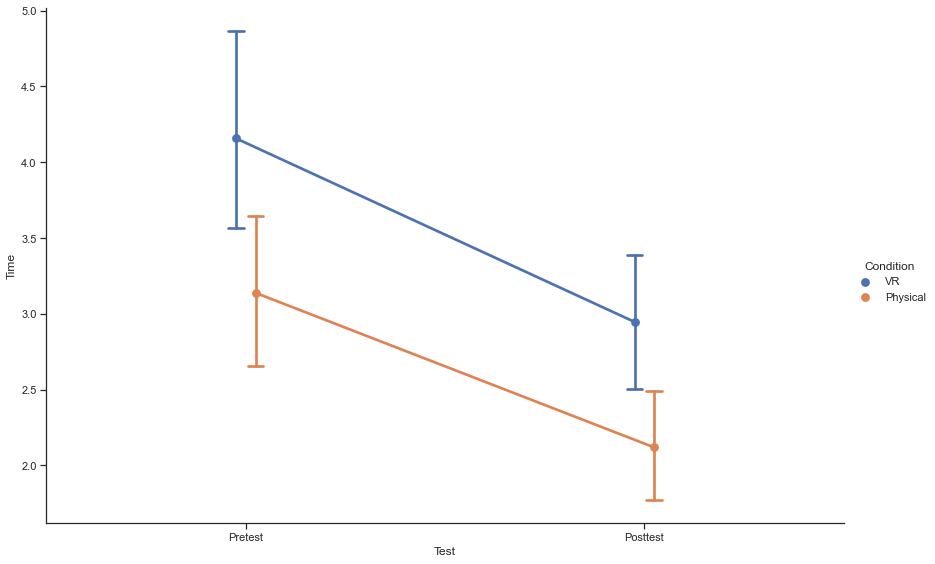

In [66]:
sns.catplot(x='Test', y='Time', dodge = True, hue= 'Condition', kind="point", data=combined_results_df_long, size=8, aspect=1.5, capsize=.04)

In [18]:
vr_nasatlx_df = pd.read_csv('..\\OnlineSurvey\\VR_Nasa.csv')
ph_nasatlx_df = pd.read_csv('..\\OnlineSurvey\\Ph_Nasa.csv')
vr_nasatlx_df['Condition'] = 'VR'
ph_nasatlx_df['Condition'] = 'Physical'
nasatlx_df = pd.concat([vr_nasatlx_df, ph_nasatlx_df])
nasatlx_df_long = nasatlx_df.melt(id_vars=['Condition'], var_name='Variable', value_name='Level')
nasatlx_df_long

,Condition,Variable,Level
0,VR,Mental Demand,13
1,VR,Mental Demand,12
2,VR,Mental Demand,8
3,VR,Mental Demand,8
4,VR,Mental Demand,18
...,...,...,...
517,Physical,Frustration,17
518,Physical,Frustration,2
519,Physical,Frustration,11
520,Physical,Frustration,3


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


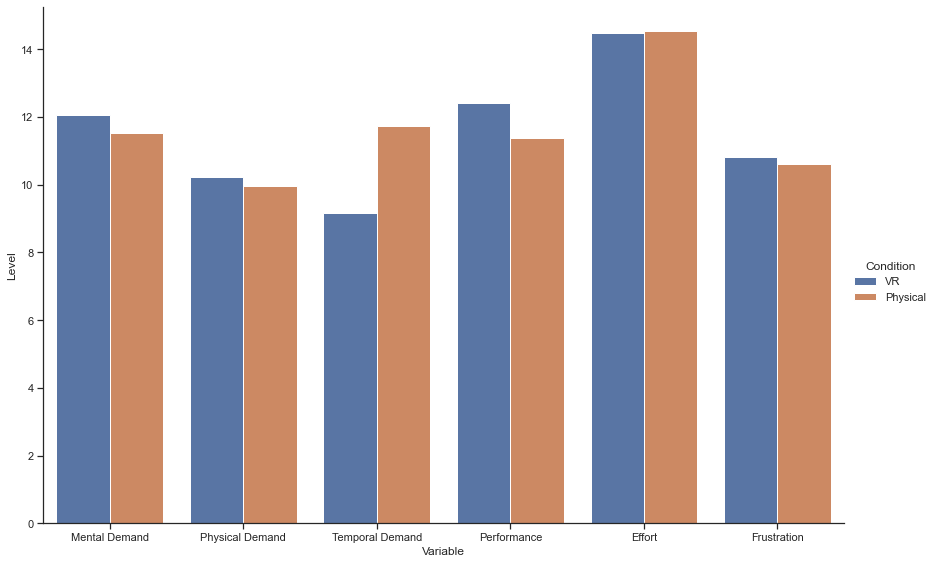

In [68]:

sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=nasatlx_df_long, size=8, aspect=1.5, ci = None)

In [ ]:
ph_nasatlx_df['Frustration'].describe()

count    42.000000
mean     10.619048
std       5.656649
min       1.000000
25%       5.000000
50%      12.000000
75%      15.000000
max      21.000000
Name: Frustration, dtype: float64

Mann Whitney U test for Mental Demand in VR vs physical
MannwhitneyuResult(statistic=874.0, pvalue=0.5476396506501511)
Mann Whitney U test for Physical Demand in VR vs physical
MannwhitneyuResult(statistic=915.0, pvalue=0.8017537172432971)
Mann Whitney U test for Temporal Demand in VR vs physical
MannwhitneyuResult(statistic=1240.0, pvalue=0.012120548114918736)
Mann Whitney U test for Performance in VR vs physical
MannwhitneyuResult(statistic=802.0, pvalue=0.22471942196316996)
Mann Whitney U test for Effort in VR vs physical
MannwhitneyuResult(statistic=973.0, pvalue=0.814670863592921)
Mann Whitney U test for Frustration in VR vs physical
MannwhitneyuResult(statistic=922.5, pvalue=0.8514775130430722)


In [ ]:
#Create a dataframe with the mean values of each column in the ph_nasatlx_df and vr_nasatlx_df
#nasatlx_df = pd.DataFrame(columns=['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration'])
#nasatlx_df = nasatlx_df.append(pd.DataFrame([[ph_nasatlx_df['Mental Demand'].mean(), ph_nasatlx_df['Physical Demand'].mean(), ph_nasatlx_df['Temporal Demand'].mean(), ph_nasatlx_df['Performance'].mean(), ph_nasatlx_df['Effort'].mean(), ph_nasatlx_df['Frustration'].mean()]], columns=['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration'], index=['PH'] ))
#nasatlx_df = nasatlx_df.append(pd.DataFrame([[vr_nasatlx_df['Mental Demand'].mean(), vr_nasatlx_df['Physical Demand'].mean(), vr_nasatlx_df['Temporal Demand'].mean(), vr_nasatlx_df['Performance'].mean(), vr_nasatlx_df['Effort'].mean(), vr_nasatlx_df['Frustration'].mean()]], columns=['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration'], index=['VR'] ))

In [ ]:
#nasatlx_df

,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration
PH,11.523810,9.952381,11.714286,11.380952,14.523810,10.619048
VR,12.066667,10.222222,9.155556,12.400000,14.488889,10.822222


In [4]:
import neurokit2 as nk

# Download example data
data = nk.data("bio_eventrelated_100hz")

# Preprocess the data (filter, find peaks, etc.)
processed_data, info = nk.bio_process(ecg=data["ECG"], rsp=data["RSP"], eda=data["EDA"], sampling_rate=100)

# Compute relevant features
results = nk.bio_analyze(processed_data, sampling_rate=100)

C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


In [9]:
results.columns

Index(['ECG_Rate_Mean', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1',
       'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD',
       ...
       'SCR_Peaks_N', 'SCR_Peaks_Amplitude_Mean', 'RSA_P2T_Mean',
       'RSA_P2T_Mean_log', 'RSA_P2T_SD', 'RSA_P2T_NoRSA', 'RSA_PorgesBohrer',
       'RSA_Gates_Mean', 'RSA_Gates_Mean_log', 'RSA_Gates_SD'],
      dtype='object', length=113)